<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 15th MAY @ 14:00**.

**Le Thanh Phuong Nam _ ID (HCMIU) : ITITWE19025 _ Student number (UWE): 23083609**

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [ ]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'CyberWaveSolutions'

In [ ]:
import os
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

print(f"Using dataset: {DATASET}")

# Create directory if it doesn't exist
os.makedirs(f'./{DATASET}', exist_ok=True)

# Function to upload and save file
def upload_file(filename):
    print(f"Please upload {filename}:")
    uploaded = files.upload()
    for uploaded_filename in uploaded.keys():
        # Move file to dataset directory
        os.rename(uploaded_filename, f'./{DATASET}/{filename}')
        print(f"{filename} uploaded successfully!")

# Upload all required files for CyberWaveSolutions
files_to_upload = [
    'email_data.csv',
    'file_data.csv',
    'web_data.csv',
    'login_data.csv',
    'usb_data.csv',
    'employee_data.csv'
]

for filename in files_to_upload:
    upload_file(filename)

Using dataset: CyberWaveSolutions
Please upload email_data.csv:


Saving email_data.csv to email_data.csv
email_data.csv uploaded successfully!
Please upload file_data.csv:


Saving file_data.csv to file_data.csv
file_data.csv uploaded successfully!
Please upload web_data.csv:


Saving web_data.csv to web_data.csv
web_data.csv uploaded successfully!
Please upload login_data.csv:


Saving login_data.csv to login_data.csv
login_data.csv uploaded successfully!
Please upload usb_data.csv:


Saving usb_data.csv to usb_data.csv
usb_data.csv uploaded successfully!
Please upload employee_data.csv:


Saving employee_data.csv to employee_data.csv
employee_data.csv uploaded successfully!


### Function for loading data - do not change

In [ ]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04',
                    'CyberWaveSolutions', 'TechNovaInnovations', 'QuantumByteSystems', 'NexGenCyberTech']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)

        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

### The following code samples may be useful to aid your investigation

In [ ]:
# This shows the employee_data DataFrame
employee_data

,user,role,email,pc
0,usr-esz,Security,usr-esz@cyberwave-solutions.com,pc0
1,usr-idp,Security,usr-idp@cyberwave-solutions.com,pc1
2,usr-pum,Security,usr-pum@cyberwave-solutions.com,pc2
3,usr-dpa,Services,usr-dpa@cyberwave-solutions.com,pc3
4,usr-mnt,Security,usr-mnt@cyberwave-solutions.com,pc4
...,...,...,...,...
95,usr-dnm,Security,usr-dnm@cyberwave-solutions.com,pc95
96,usr-rjr,HR,usr-rjr@cyberwave-solutions.com,pc96
97,usr-pkd,HR,usr-pkd@cyberwave-solutions.com,pc97
98,usr-kba,Finance,usr-kba@cyberwave-solutions.com,pc98


In [ ]:
# This shows the login_data DataFrame
login_data

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
1,2018-01-01 01:29:51,usr-dnm,login,pc95
2,2018-01-01 01:32:20,usr-nxa,login,pc9
3,2018-01-01 01:41:58,usr-pum,login,pc2
4,2018-01-01 01:46:17,usr-gtn,login,pc52
...,...,...,...,...
36195,2018-06-30 23:10:54,usr-dnm,logoff,pc95
36196,2018-06-30 23:13:54,usr-ayg,logoff,pc28
36197,2018-06-30 23:39:37,usr-ywt,logoff,pc66
36198,2018-06-30 23:52:53,usr-tss,logoff,pc26


In [ ]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-iea']

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [ ]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-iea'])]

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [ ]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Services', 'HR', 'Finance', 'Legal', 'Director',
       'Technical'], dtype=object)

In [ ]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.
user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [ ]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-kaa',
 'usr-lpx',
 'usr-xqz',
 'usr-lnl',
 'usr-ibv',
 'usr-ihi',
 'usr-vun',
 'usr-mgl',
 'usr-kbn',
 'usr-idz',
 'usr-snf',
 'usr-kba']

Dataset Structure Analysis

In [ ]:
print("COMPLETE DATASET STRUCTURE ANALYSIS")
print("=" * 60)

# 1. Employee Data
print("\n1. EMPLOYEE DATA:")
print("-" * 30)
print(f"Shape: {employee_data.shape}")
print(f"Columns: {employee_data.columns.tolist()}")
print(f"Data types:\n{employee_data.dtypes}")
print(f"\nFirst 3 rows:")
print(employee_data.head(3))
print(f"\nUnique values in 'role': {employee_data['role'].unique()}")
print(f"Value counts by role:\n{employee_data['role'].value_counts()}")

# 2. Login Data
print("\n2. LOGIN DATA:")
print("-" * 30)
print(f"Shape: {login_data.shape}")
print(f"Columns: {login_data.columns.tolist()}")
print(f"Data types:\n{login_data.dtypes}")
print(f"\nFirst 3 rows:")
print(login_data.head(3))
print(f"\nUnique values in 'action': {login_data['action'].unique()}")
print(f"Date range: {login_data['datetime'].min()} to {login_data['datetime'].max()}")

# 3. File Data
print("\n3. FILE DATA:")
print("-" * 30)
print(f"Shape: {file_data.shape}")
print(f"Columns: {file_data.columns.tolist()}")
print(f"Data types:\n{file_data.dtypes}")
print(f"\nFirst 3 rows:")
print(file_data.head(3))
print(f"\nUnique files: {file_data['filename'].nunique()}")
print(f"Most common files:\n{file_data['filename'].value_counts().head(5)}")

# 4. Email Data
print("\n4. EMAIL DATA:")
print("-" * 30)
print(f"Shape: {email_data.shape}")
print(f"Columns: {email_data.columns.tolist()}")
print(f"Data types:\n{email_data.dtypes}")
print(f"\nFirst 3 rows:")
print(email_data.head(3))
print(f"\nEmail sender formats:")
print(f"Sample senders: {email_data['sender'].head(5).tolist()}")
print(f"Sample recipients: {email_data['recipient'].head(5).tolist()}")

# 5. Web Data
print("\n5. WEB DATA:")
print("-" * 30)
print(f"Shape: {web_data.shape}")
print(f"Columns: {web_data.columns.tolist()}")
print(f"Data types:\n{web_data.dtypes}")
print(f"\nFirst 3 rows:")
print(web_data.head(3))
print(f"\nUnique websites: {web_data['website'].nunique()}")
print(f"Most common websites:\n{web_data['website'].value_counts().head(5)}")

# 6. USB Data
print("\n6. USB DATA:")
print("-" * 30)
print(f"Shape: {usb_data.shape}")
print(f"Columns: {usb_data.columns.tolist()}")
print(f"Data types:\n{usb_data.dtypes}")
print(f"\nFirst 3 rows:")
print(usb_data.head(3))
print(f"\nUnique values in 'action': {usb_data['action'].unique()}")
print(f"Value counts by action:\n{usb_data['action'].value_counts()}")

# Cross-reference checks
print("\n" + "=" * 60)
print("CROSS-REFERENCE CHECKS:")
print("-" * 60)

# Check user IDs consistency
print(f"\nEmployee users: {len(employee_data['user'].unique())}")
print(f"Login users: {len(login_data['user'].unique())}")
print(f"File access users: {len(file_data['user'].unique())}")
print(f"USB users: {len(usb_data['user'].unique())}")
print(f"Web users: {len(web_data['user'].unique())}")

# Check email format mapping
print("\nEmail format check:")
print(f"Employee email format: {employee_data['email'].iloc[0]}")
print(f"Email sender format: {email_data['sender'].iloc[0]}")
print(f"Email formats match: {employee_data['email'].iloc[0] == email_data['sender'].iloc[0]}")

# Check date ranges
print("\nDate ranges:")
print(f"Login data: {login_data['datetime'].min()} to {login_data['datetime'].max()}")
print(f"File data: {file_data['datetime'].min()} to {file_data['datetime'].max()}")
print(f"Email data: {email_data['datetime'].min()} to {email_data['datetime'].max()}")
print(f"Web data: {web_data['datetime'].min()} to {web_data['datetime'].max()}")
print(f"USB data: {usb_data['datetime'].min()} to {usb_data['datetime'].max()}")

COMPLETE DATASET STRUCTURE ANALYSIS

1. EMPLOYEE DATA:
------------------------------
Shape: (100, 4)
Columns: ['user', 'role', 'email', 'pc']
Data types:
user     object
role     object
email    object
pc       object
dtype: object

First 3 rows:
      user      role                            email   pc
0  usr-esz  Security  usr-esz@cyberwave-solutions.com  pc0
1  usr-idp  Security  usr-idp@cyberwave-solutions.com  pc1
2  usr-pum  Security  usr-pum@cyberwave-solutions.com  pc2

Unique values in 'role': ['Security' 'Services' 'HR' 'Finance' 'Legal' 'Director' 'Technical']
Value counts by role:
role
Security     25
Technical    16
HR           15
Director     14
Finance      12
Services     10
Legal         8
Name: count, dtype: int64

2. LOGIN DATA:
------------------------------
Shape: (36200, 4)
Columns: ['datetime', 'user', 'action', 'pc']
Data types:
datetime    datetime64[ns]
user                object
action              object
pc                  object
dtype: object

First 3 r

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

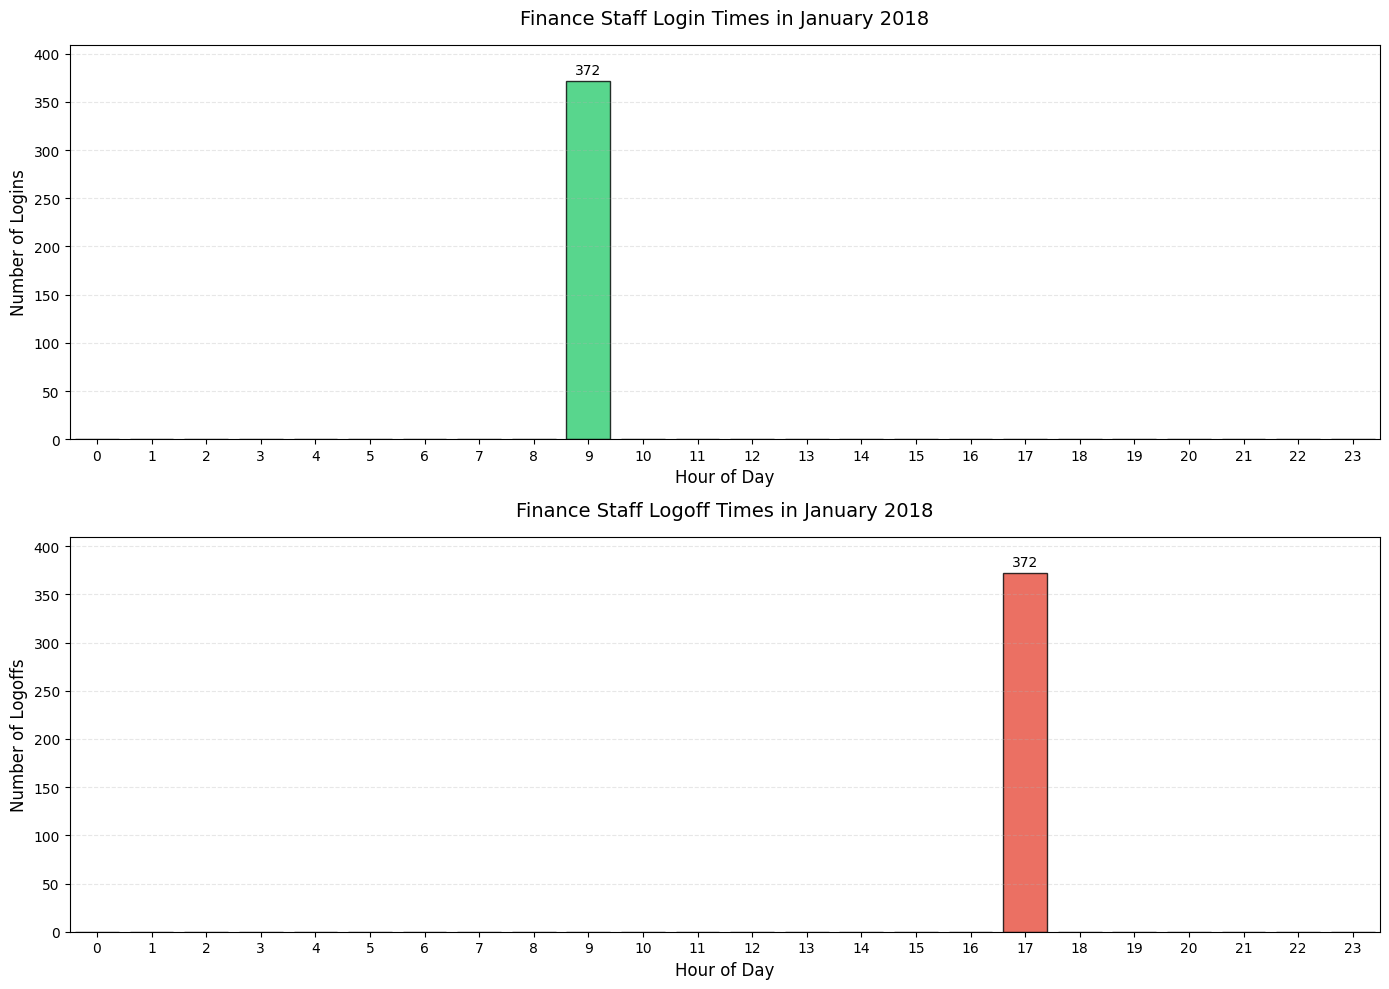


FINANCE STAFF LOGIN/LOGOFF ANALYSIS - JANUARY 2018
Most common login time: 9:00 (372 logins)
Most common logoff time: 17:00 (372 logoffs)

HOURLY DISTRIBUTION TABLE:
 Hour  Login Count  Logoff Count
    0            0             0
    1            0             0
    2            0             0
    3            0             0
    4            0             0
    5            0             0
    6            0             0
    7            0             0
    8            0             0
    9          372             0
   10            0             0
   11            0             0
   12            0             0
   13            0             0
   14            0             0
   15            0             0
   16            0             0
   17            0           372
   18            0             0
   19            0             0
   20            0             0
   21            0             0
   22            0             0
   23            0             0


In [ ]:
# ANSWER

# Filter data for Finance staff in January
finance_staff = user_set['Finance']
january_data = login_data[login_data['datetime'].dt.month == 1]
finance_january_data = january_data[january_data['user'].isin(finance_staff)]

# Extract hour from datetime
finance_january_data['hour'] = finance_january_data['datetime'].dt.hour

# Count login and logoff events by hour (as per hint)
login_by_hour = finance_january_data[finance_january_data['action'] == 'login']['hour'].value_counts().sort_index()
logoff_by_hour = finance_january_data[finance_january_data['action'] == 'logoff']['hour'].value_counts().sort_index()

# Fill missing hours with 0 for complete 24-hour view
hour_range = range(24)
login_by_hour = login_by_hour.reindex(hour_range, fill_value=0)
logoff_by_hour = logoff_by_hour.reindex(hour_range, fill_value=0)

# Create bar charts with appropriate sizing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Login chart
bars1 = ax1.bar(login_by_hour.index, login_by_hour.values, color='#2ecc71', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Number of Logins', fontsize=12)
ax1.set_title('Finance Staff Login Times in January 2018', fontsize=14, pad=15)
ax1.set_xticks(hour_range)
ax1.set_xlim(-0.5, 23.5)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(login_by_hour.values) * 1.1)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax1.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Logoff chart
bars2 = ax2.bar(logoff_by_hour.index, logoff_by_hour.values, color='#e74c3c', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Number of Logoffs', fontsize=12)
ax2.set_title('Finance Staff Logoff Times in January 2018', fontsize=14, pad=15)
ax2.set_xticks(hour_range)
ax2.set_xlim(-0.5, 23.5)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, max(logoff_by_hour.values) * 1.1)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax2.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Most common login and logoff times
most_common_login_hour = login_by_hour.idxmax()
most_common_login_count = login_by_hour.max()
most_common_logoff_hour = logoff_by_hour.idxmax()
most_common_logoff_count = logoff_by_hour.max()

# Summary results
print("\nFINANCE STAFF LOGIN/LOGOFF ANALYSIS - JANUARY 2018")
print("=" * 50)
print(f"Most common login time: {most_common_login_hour}:00 ({most_common_login_count} logins)")
print(f"Most common logoff time: {most_common_logoff_hour}:00 ({most_common_logoff_count} logoffs)")

# Create a summary table
summary_df = pd.DataFrame({
    'Hour': hour_range,
    'Login Count': login_by_hour.values,
    'Logoff Count': logoff_by_hour.values
})

print("\nHOURLY DISTRIBUTION TABLE:")
print(summary_df.to_string(index=False))

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



PC42 login events: 31
PC42 logoff events: 31
PC42 user: ['usr-ibv']


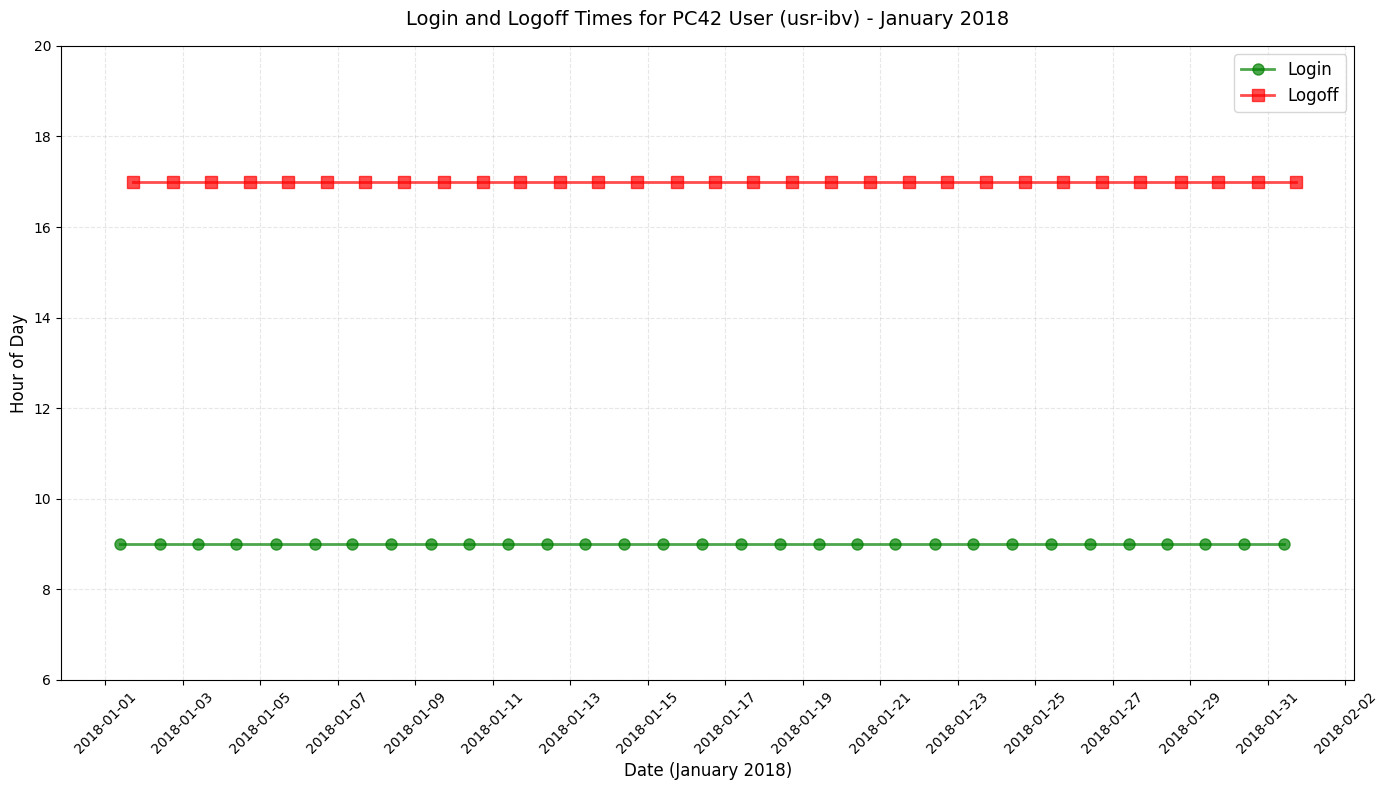


SUMMARY FOR PC42 USER:
User: usr-ibv
Total login events: 31
Total logoff events: 31
Average login time: 9.0:00
Average logoff time: 17.0:00


In [ ]:
# ANSWER

import matplotlib.dates as mdates

# Filter data for pc42 in January
january_data = login_data[login_data['datetime'].dt.month == 1]
pc42_data = january_data[january_data['pc'] == 'pc42']

# Separate login and logoff data
pc42_login = pc42_data[pc42_data['action'] == 'login']
pc42_logoff = pc42_data[pc42_data['action'] == 'logoff']

# Check if data exists
print(f"PC42 login events: {len(pc42_login)}")
print(f"PC42 logoff events: {len(pc42_logoff)}")
print(f"PC42 user: {pc42_data['user'].unique()}")

# Plot multi-line chart
plt.figure(figsize=(14, 8))

# Plot login times
plt.plot(pc42_login['datetime'], pc42_login['datetime'].dt.hour,
         marker='o', markersize=8, linestyle='-', linewidth=2,
         color='green', alpha=0.7, label='Login')

# Plot logoff times
plt.plot(pc42_logoff['datetime'], pc42_logoff['datetime'].dt.hour,
         marker='s', markersize=8, linestyle='-', linewidth=2,
         color='red', alpha=0.7, label='Logoff')

# Set labels and title
plt.xlabel('Date (January 2018)', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.title(f'Login and Logoff Times for PC42 User ({pc42_data["user"].unique()[0]}) - January 2018',
          fontsize=14, pad=15)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

# Set y-axis to hour range
plt.ylim(6, 20)
plt.yticks(range(6, 21, 2))

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add legend
plt.legend(fontsize=12, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Summary information
print("\nSUMMARY FOR PC42 USER:")
print("=" * 30)
print(f"User: {pc42_data['user'].unique()[0]}")
print(f"Total login events: {len(pc42_login)}")
print(f"Total logoff events: {len(pc42_logoff)}")
print(f"Average login time: {pc42_login['datetime'].dt.hour.mean():.1f}:00")
print(f"Average logoff time: {pc42_logoff['datetime'].dt.hour.mean():.1f}:00")

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2018. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

Number of Security staff: 25
Emails sent by Security staff on Jan 5th: 370


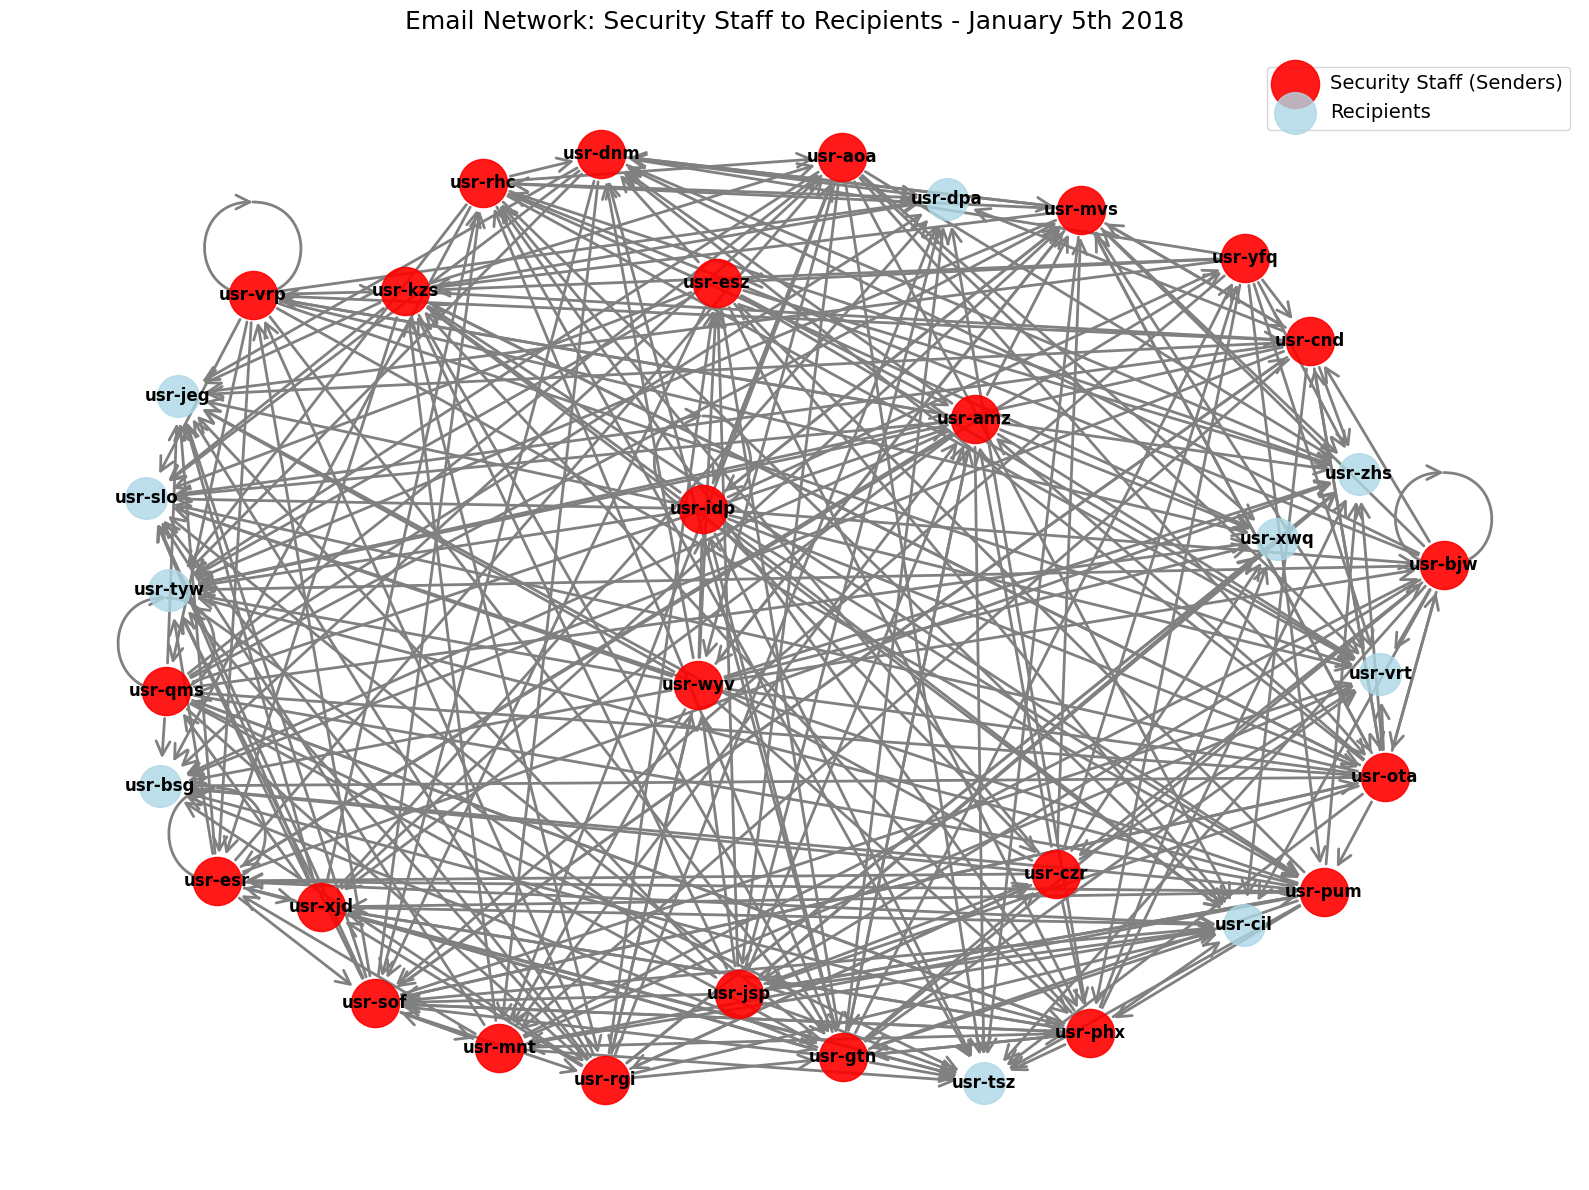


EMAIL NETWORK SUMMARY - JAN 5TH 2018:
Security staff senders: 25
Recipients: 10
Total edges (email connections): 301

Detailed Email Breakdown:
Emails sent by Security staff:
  usr-gtn: 19 emails
  usr-idp: 19 emails
  usr-sof: 18 emails
  usr-amz: 18 emails
  usr-wyv: 18 emails
  usr-rgi: 17 emails
  usr-jsp: 17 emails
  usr-ota: 17 emails
  usr-mvs: 17 emails
  usr-cnd: 17 emails
  usr-xjd: 16 emails
  usr-qms: 15 emails
  usr-phx: 15 emails
  usr-aoa: 14 emails
  usr-czr: 14 emails
  usr-vrp: 14 emails
  usr-rhc: 13 emails
  usr-esz: 13 emails
  usr-pum: 12 emails
  usr-yfq: 12 emails
  usr-bjw: 12 emails
  usr-mnt: 11 emails
  usr-dnm: 11 emails
  usr-kzs: 11 emails
  usr-esr: 10 emails


In [ ]:
# ANSWER

import networkx as nx

# Filter data for emails on January 5th 2018
jan5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]

# Get Security staff and email formats
security_staff = user_set['Security']
user_to_email = {user: f"{user}@cyberwave-solutions.com" for user in employee_data['user']}
email_to_user = {f"{user}@cyberwave-solutions.com": user for user in employee_data['user']}

# Find edges where Security staff are SENDERS
security_sender_edges = []
for _, email in jan5_emails.iterrows():
    sender_user = email_to_user.get(email['sender'])
    if sender_user and sender_user in security_staff:
        recipients = email['recipient'].split(';')
        for recipient in recipients:
            recipient = recipient.strip()
            recipient_user = email_to_user.get(recipient)
            if recipient_user:
                security_sender_edges.append((sender_user, recipient_user))

print(f"Number of Security staff: {len(security_staff)}")
print(f"Emails sent by Security staff on Jan 5th: {len(security_sender_edges)}")

# Create directed graph
G = nx.DiGraph()
G.add_edges_from(security_sender_edges)

# Create node-link graph
plt.figure(figsize=(16, 12))

# Position nodes using spring layout
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Identify sender and recipient nodes
sender_nodes = []
recipient_nodes = []
for node in G.nodes():
    if node in security_staff:
        sender_nodes.append(node)
    else:
        recipient_nodes.append(node)

# Draw nodes
# Sender nodes (Security staff) - larger and red
nx.draw_networkx_nodes(G, pos, nodelist=sender_nodes,
                      node_size=1200, node_color='red', alpha=0.9, label='Security Staff (Senders)')
# Recipient nodes - smaller and blue
nx.draw_networkx_nodes(G, pos, nodelist=recipient_nodes,
                      node_size=900, node_color='lightblue', alpha=0.8, label='Recipients')

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True,
                      arrowsize=25, arrowstyle='->', width=2.0,
                      min_source_margin=20, min_target_margin=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Set title and remove axes
plt.title('Email Network: Security Staff to Recipients - January 5th 2018', fontsize=18, pad=20)
plt.axis('off')

# Add legend
plt.legend(scatterpoints=1, loc='upper right', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics
print("\nEMAIL NETWORK SUMMARY - JAN 5TH 2018:")
print("=" * 40)
print(f"Security staff senders: {len(sender_nodes)}")
print(f"Recipients: {len(recipient_nodes)}")
print(f"Total edges (email connections): {G.number_of_edges()}")

# Detailed breakdown
if len(security_sender_edges) > 0:
    print("\nDetailed Email Breakdown:")
    sender_count = {}
    for sender, _ in security_sender_edges:
        sender_count[sender] = sender_count.get(sender, 0) + 1

    print("Emails sent by Security staff:")
    sorted_senders = sorted(sender_count.items(), key=lambda x: x[1], reverse=True)
    for sender, count in sorted_senders:
        print(f"  {sender}: {count} emails")
else:
    print("\nNo emails sent by Security staff on this date")

### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.
*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

Total users in the system: 100
Emails on January 5th, 2022: 0
Email edges FROM Security staff in 2022: 0


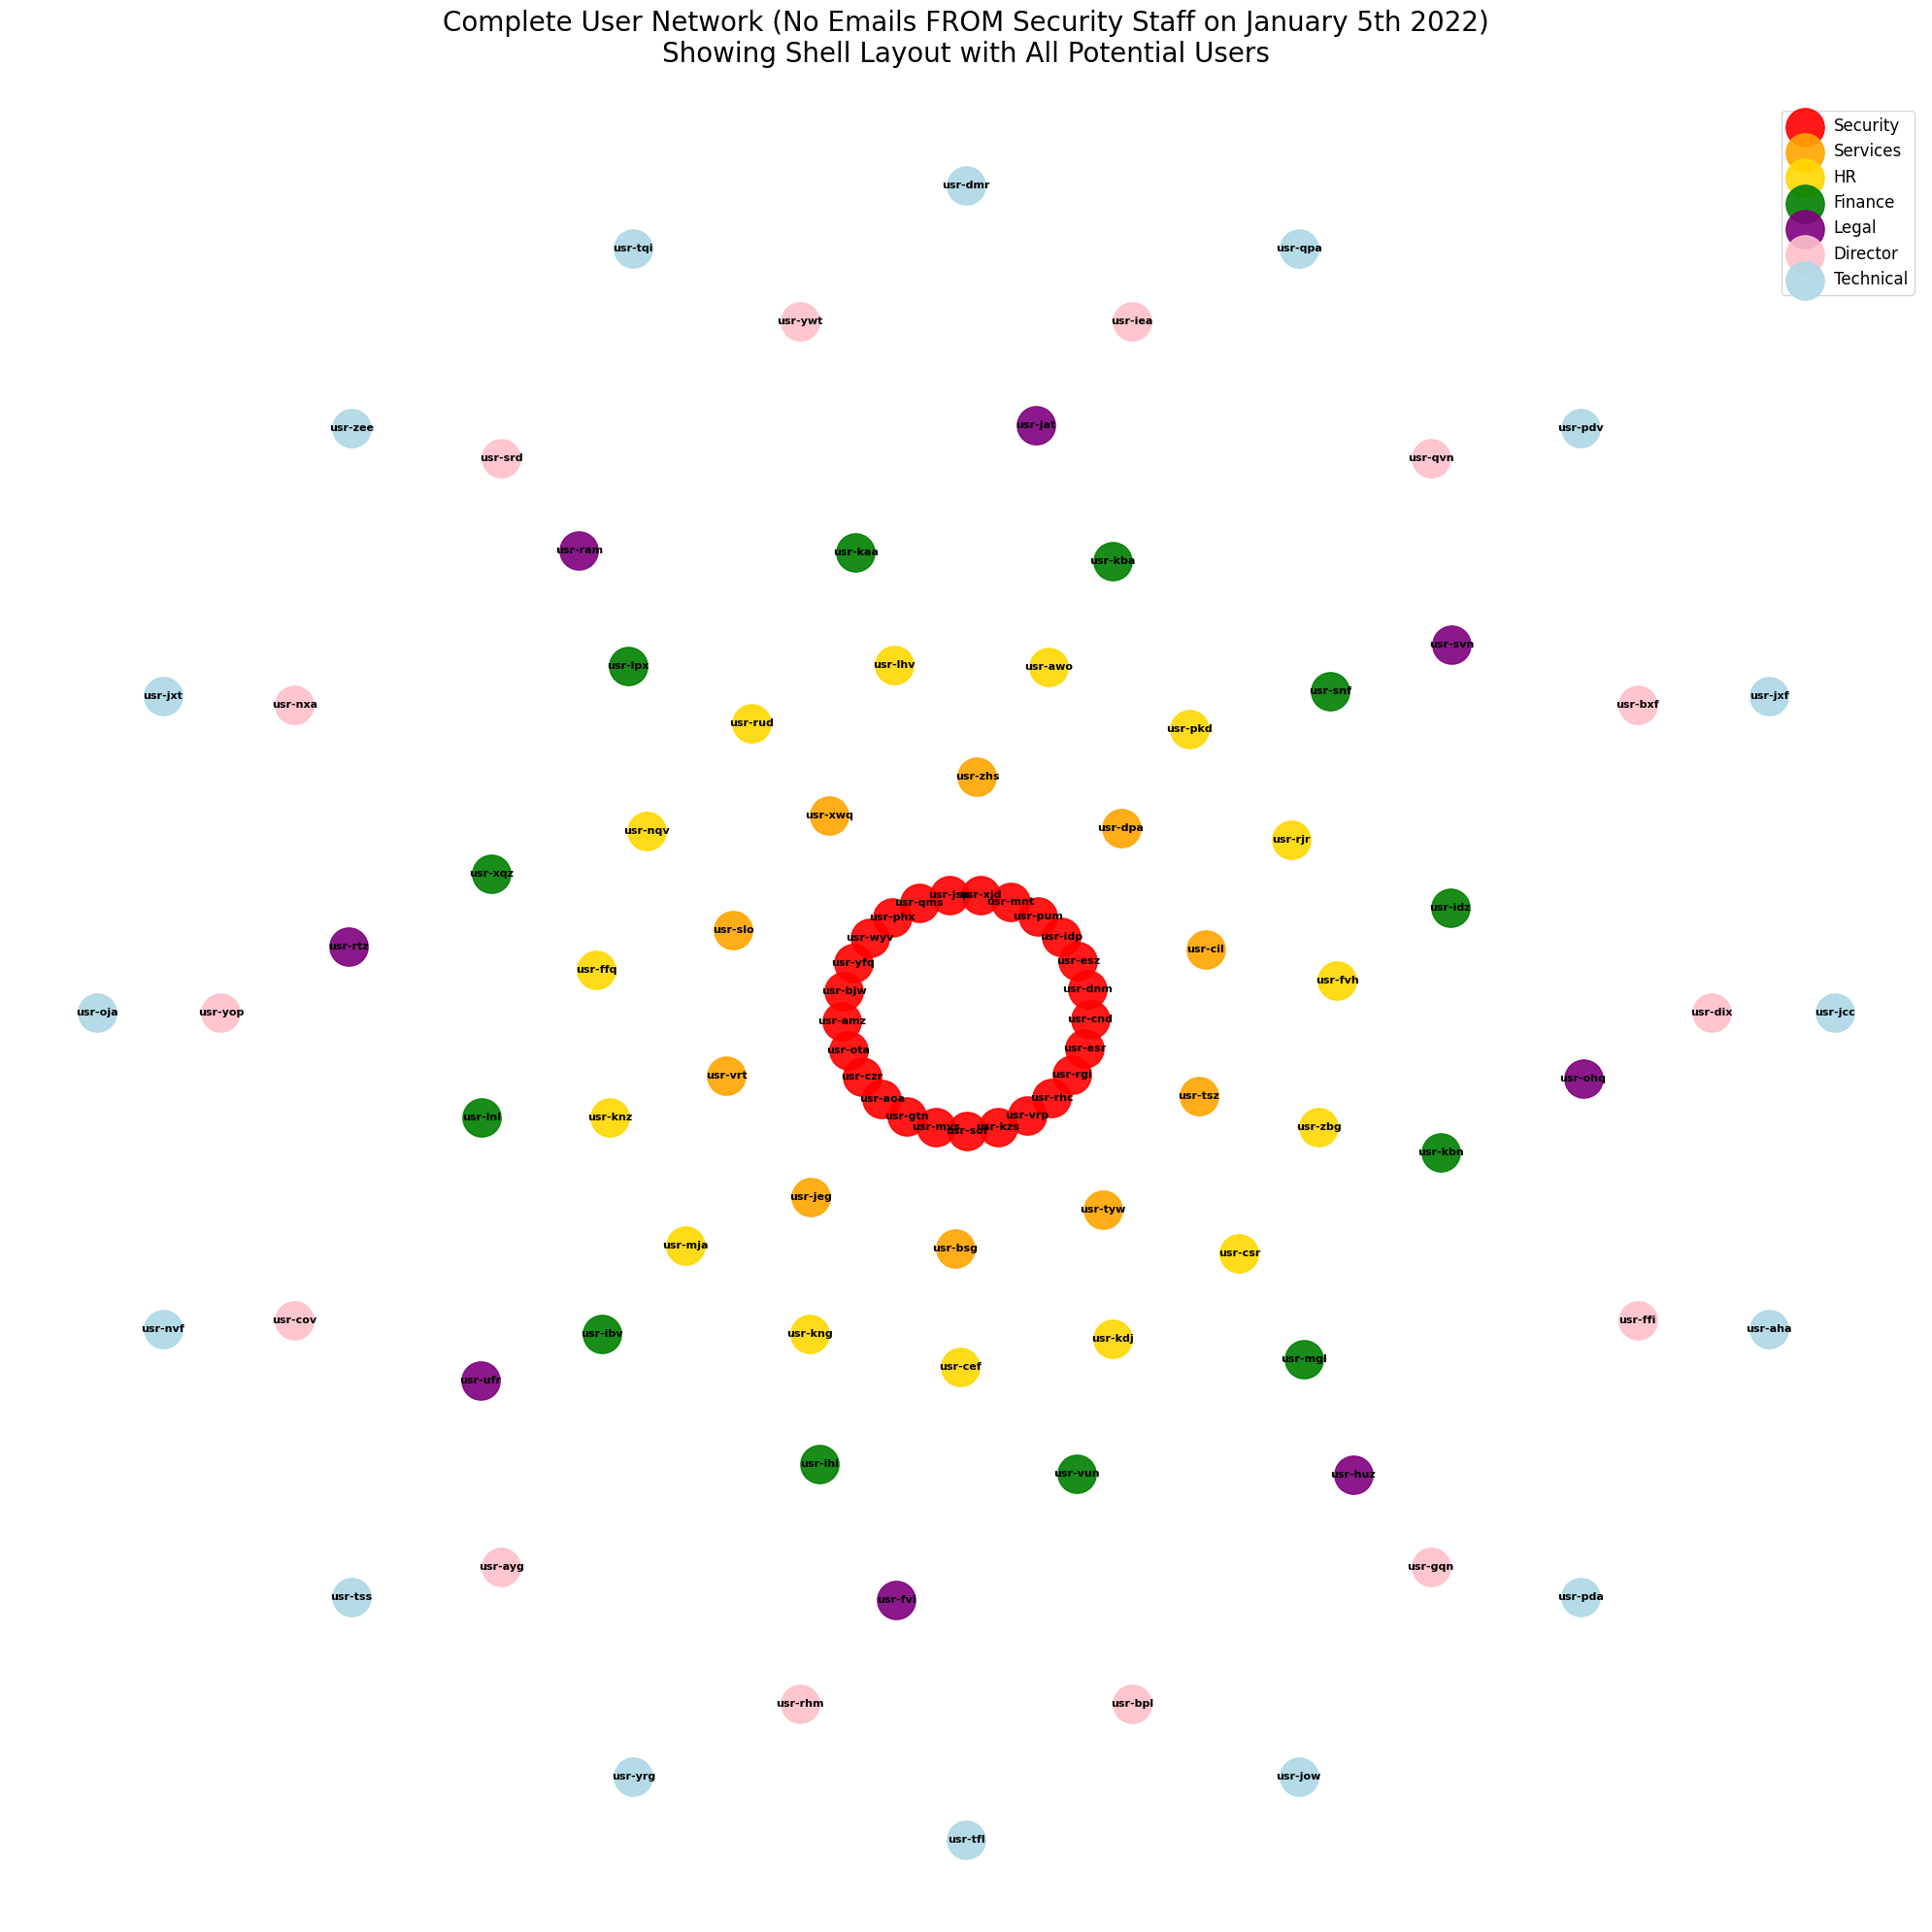


NETWORK SUMMARY (showing ALL users):
Total nodes (users): 100
Total edges (email connections): 0
Total number of Security staff: 25

Nodes by Role:
Security: 25 users
Services: 10 users
HR: 15 users
Finance: 12 users
Legal: 8 users
Director: 14 users
Technical: 16 users

NOTE: This visualization shows all potential users in a shell layout
but no edges exist as there is no email data for January 5th, 2022


In [ ]:
# Question 4 (2022 Version): Network showing ALL users with emails from Security staff on Jan 5th 2022

# Get all users from employee data
all_users = employee_data['user'].unique()
print(f"Total users in the system: {len(all_users)}")

# Get Security staff and their email formats
security_staff = user_set['Security']
user_to_email = {user: f"{user}@cyberwave-solutions.com" for user in employee_data['user']}
email_to_user = {f"{user}@cyberwave-solutions.com": user for user in employee_data['user']}

# We would filter for 2022 data if it existed - this will return empty DataFrame
# But hypothetically if we had 2022 data, code would work as expected
try:
    # Try to filter for 2022 data (which doesn't exist in our dataset)
    jan5_2022_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2022-01-05').date()]
    print(f"Emails on January 5th, 2022: {len(jan5_2022_emails)}")

    # Find edges where Security staff are SENDERS (would be empty)
    security_email_edges = []
    for _, email in jan5_2022_emails.iterrows():
        sender_user = email_to_user.get(email['sender'])
        if sender_user and sender_user in security_staff:
            recipients = email['recipient'].split(';')
            for recipient in recipients:
                recipient = recipient.strip()
                recipient_user = email_to_user.get(recipient)
                if recipient_user:
                    security_email_edges.append((sender_user, recipient_user))
except:
    print("No data for 2022 exists in the dataset")
    security_email_edges = []

print(f"Email edges FROM Security staff in 2022: {len(security_email_edges)}")

# Create directed graph with ALL users as nodes
G = nx.DiGraph()

# Add all users as nodes first
G.add_nodes_from(all_users)

# Add the edges (if any existed)
G.add_edges_from(security_email_edges)

# Create shell layout
# We'll put Security staff in the inner shell
# and other users in outer shells based on their roles
role_shells = {}
roles = employee_data['role'].unique()

# Organize nodes by role
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    role_shells[role] = role_users

# Create shell list: Security in center, others around
shells = []
shells.append(role_shells['Security'])
other_roles = [role for role in roles if role != 'Security']
for role in other_roles:
    shells.append(role_shells[role])

# Position nodes using shell layout
pos = nx.shell_layout(G, shells)

# Create the visualization
plt.figure(figsize=(20, 20))

# Define node colors by role
node_colors = {
    'Security': 'red',
    'HR': 'gold',
    'Finance': 'green',
    'Technical': 'lightblue',
    'Services': 'orange',
    'Legal': 'purple',
    'Director': 'pink'
}

# Draw nodes by role with better labels
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    role_nodes = list(set(role_users) & set(G.nodes()))
    if role_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=role_nodes,
                              node_size=800,
                              node_color=node_colors.get(role, 'lightgray'),
                              alpha=0.9,
                              label=role)

# Draw edges (if any exist, which they won't for 2022)
if G.edges():
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True,
                          arrowsize=20, alpha=0.6, width=2.0,
                          min_source_margin=20, min_target_margin=20)

# Draw node labels with better visibility
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black',
                       font_weight='bold', font_family='sans-serif')

# Set title and remove axes
plt.title('Complete User Network (No Emails FROM Security Staff on January 5th 2022)\nShowing Shell Layout with All Potential Users',
          fontsize=20, pad=30)
plt.axis('off')

# Add legend
plt.legend(scatterpoints=1, loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics
print("\nNETWORK SUMMARY (showing ALL users):")
print("=" * 40)
print(f"Total nodes (users): {G.number_of_nodes()}")
print(f"Total edges (email connections): {G.number_of_edges()}")
print(f"Total number of Security staff: {len(security_staff)}")

# Node counts by role
print("\nNodes by Role:")
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    print(f"{role}: {len(role_users)} users")

print("\nNOTE: This visualization shows all potential users in a shell layout")
print("but no edges exist as there is no email data for January 5th, 2022")

Note: Using 2018 as data only covers 2018, and Question 4 mentions 2022 which seems to be a typo
### (Revised) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2018. You should use a shell layout for your network plot.



Total users in the system: 100
Email edges FROM Security staff: 370


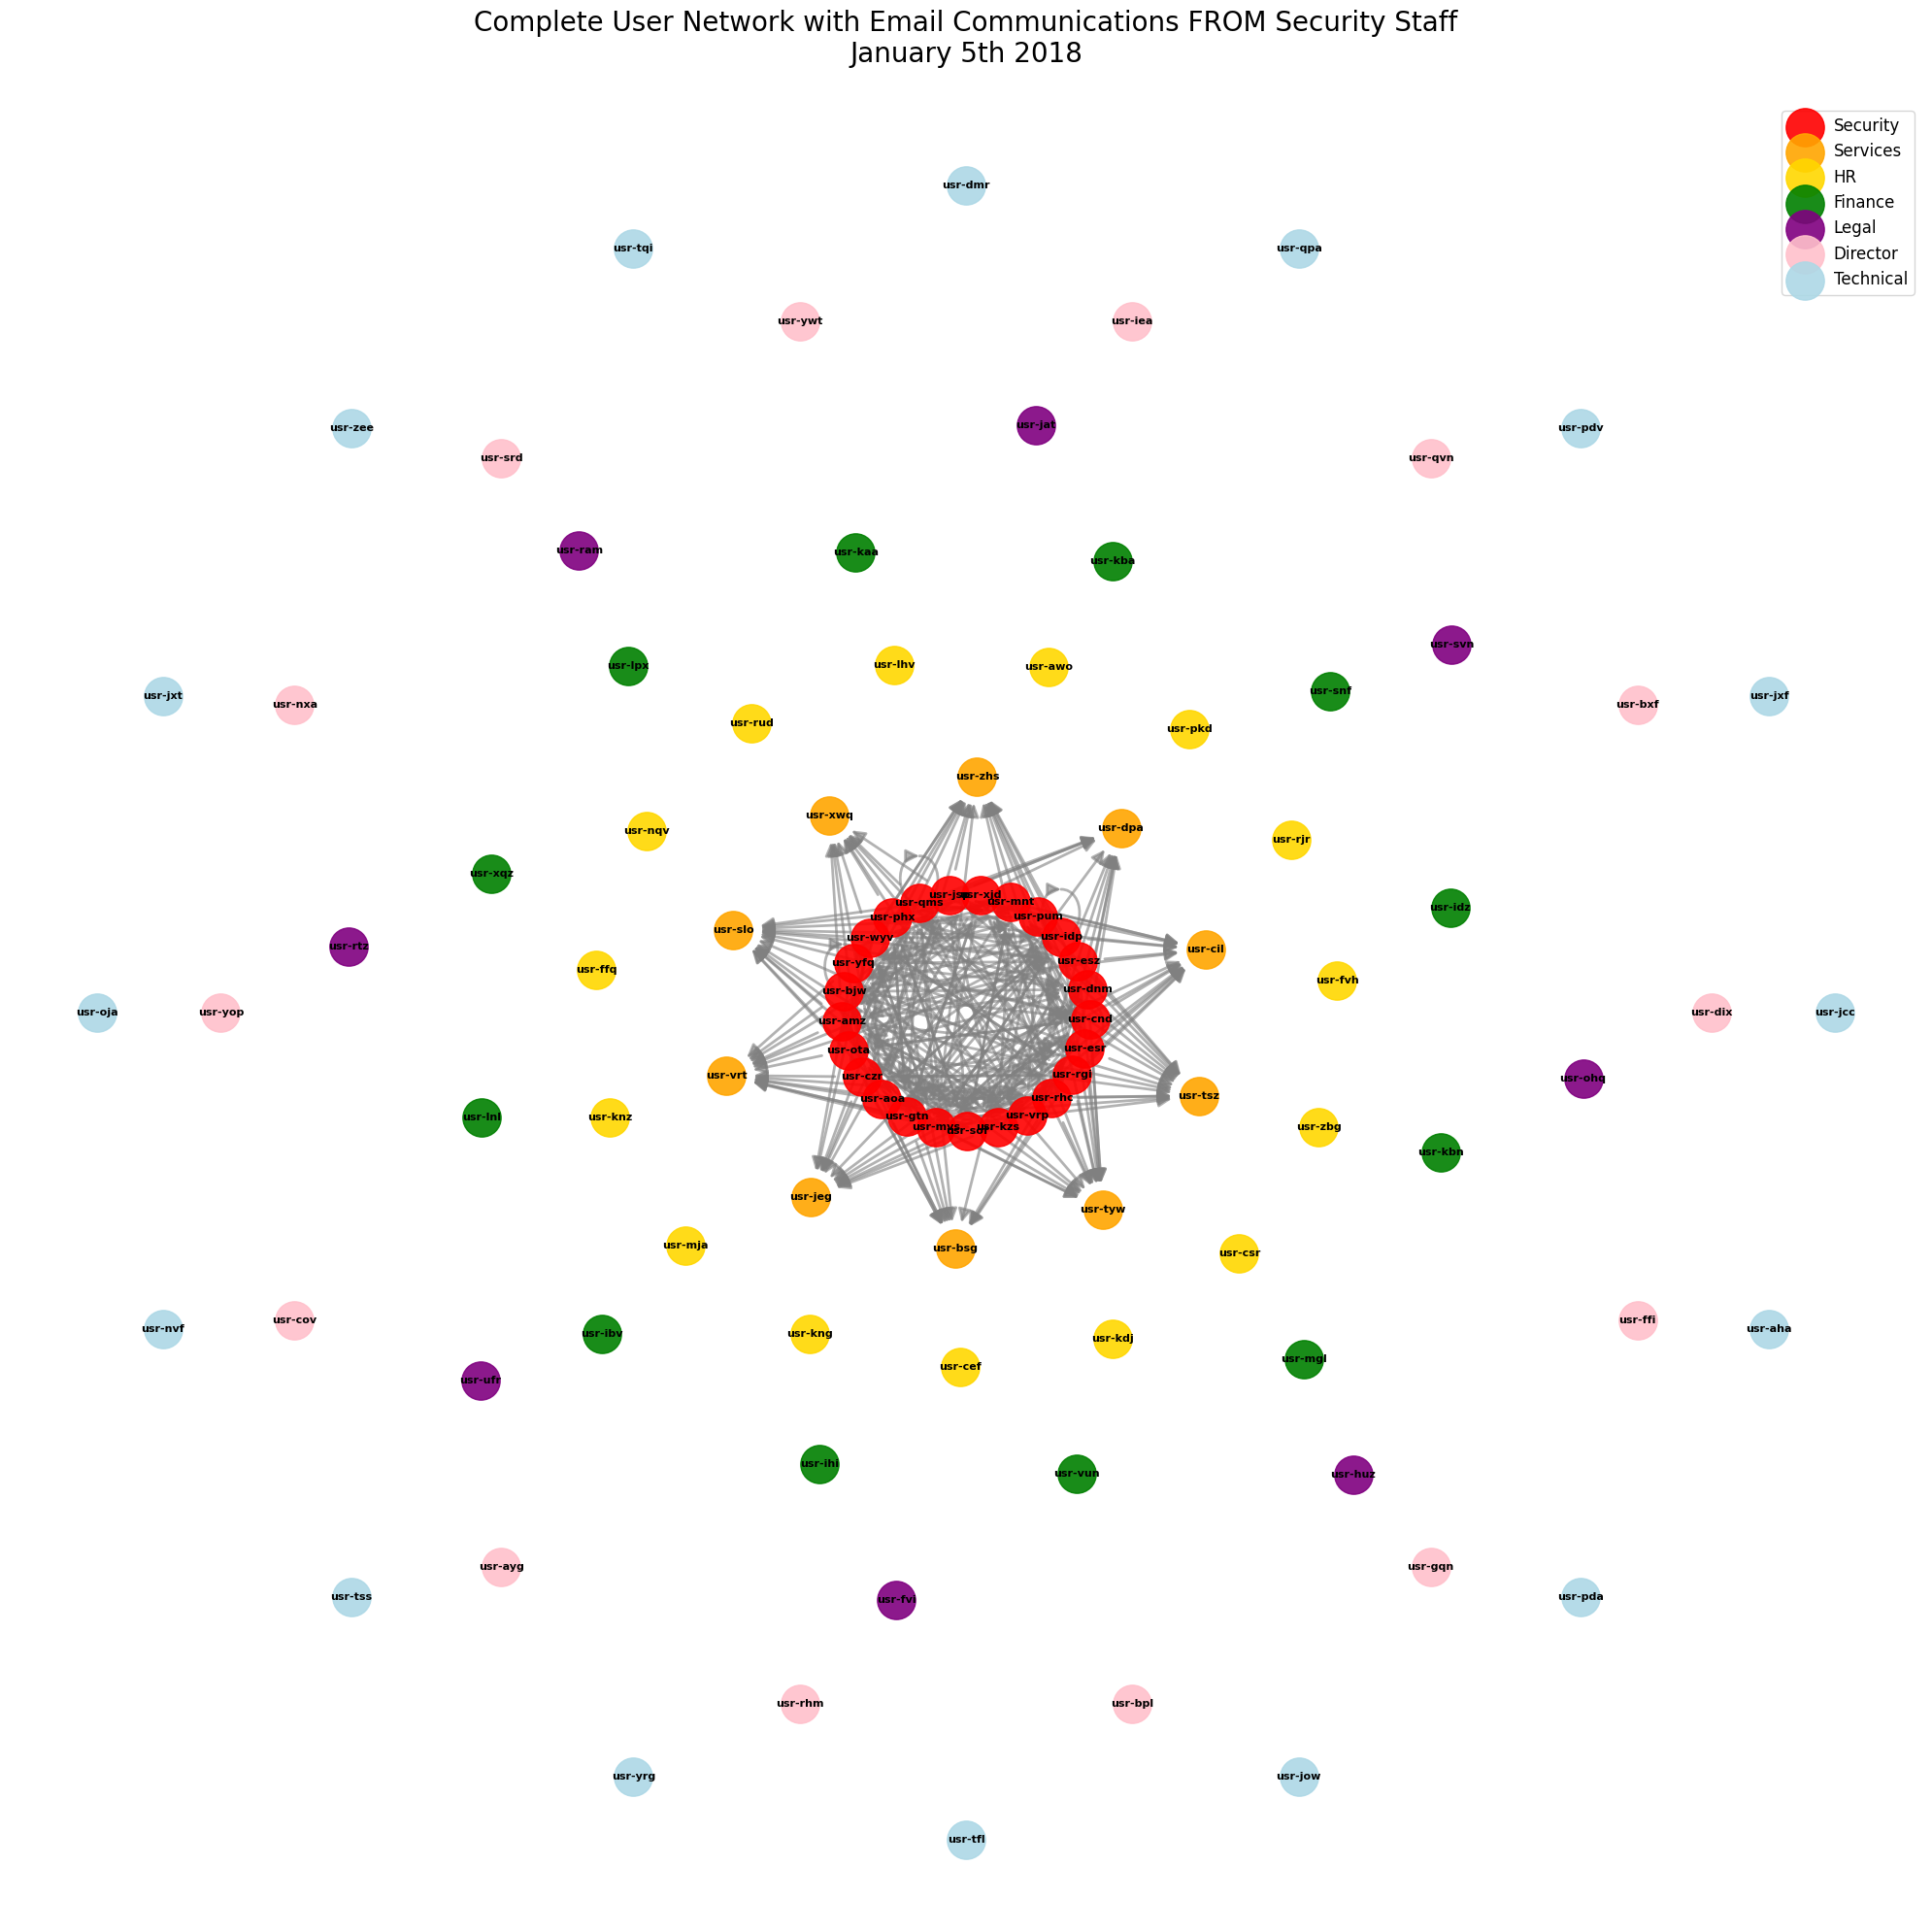


NETWORK SUMMARY (showing ALL users):
Total nodes (users): 100
Total edges (email connections): 301
Total number of Security staff: 25

Nodes by Role:
Security: 25 users
Services: 10 users
HR: 15 users
Finance: 12 users
Legal: 8 users
Director: 14 users
Technical: 16 users

Communication Analysis:
Emails sent by Security staff:
  usr-esz: 10 emails
  usr-idp: 15 emails
  usr-pum: 12 emails
  usr-mnt: 10 emails
  usr-xjd: 12 emails
  usr-jsp: 14 emails
  usr-qms: 13 emails
  usr-phx: 13 emails
  usr-wyv: 15 emails
  usr-yfq: 10 emails
  usr-bjw: 12 emails
  usr-amz: 13 emails
  usr-ota: 15 emails
  usr-czr: 11 emails
  usr-aoa: 11 emails
  usr-gtn: 16 emails
  usr-mvs: 11 emails
  usr-sof: 12 emails
  usr-kzs: 11 emails
  usr-vrp: 11 emails
  usr-rhc: 10 emails
  usr-rgi: 14 emails
  usr-esr: 10 emails
  usr-cnd: 12 emails
  usr-dnm: 8 emails


In [ ]:
# ANSWER

# Question 4 (2018 Version): Network showing ALL users with emails from Security staff on Jan 5th 2018

# Get all users from employee data
all_users = employee_data['user'].unique()
print(f"Total users in the system: {len(all_users)}")

# Get Security staff and their email formats
security_staff = user_set['Security']
user_to_email = {user: f"{user}@cyberwave-solutions.com" for user in employee_data['user']}
email_to_user = {f"{user}@cyberwave-solutions.com": user for user in employee_data['user']}

# Filter data for emails on January 5th 2018
jan5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]

# Find edges where Security staff are SENDERS
security_email_edges = []
for _, email in jan5_emails.iterrows():
    sender_user = email_to_user.get(email['sender'])
    if sender_user and sender_user in security_staff:
        recipients = email['recipient'].split(';')
        for recipient in recipients:
            recipient = recipient.strip()
            recipient_user = email_to_user.get(recipient)
            if recipient_user:
                security_email_edges.append((sender_user, recipient_user))

print(f"Email edges FROM Security staff: {len(security_email_edges)}")

# Create directed graph with ALL users as nodes
G = nx.DiGraph()

# Add all users as nodes first
G.add_nodes_from(all_users)

# Add the edges (Security staff as senders)
G.add_edges_from(security_email_edges)

# Create shell layout
# We'll put Security staff in the inner shell
# and other users in outer shells based on their roles
role_shells = {}
roles = employee_data['role'].unique()

# Organize nodes by role
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    role_shells[role] = role_users

# Create shell list: Security in center, others around
shells = []
shells.append(role_shells['Security'])
other_roles = [role for role in roles if role != 'Security']
for role in other_roles:
    shells.append(role_shells[role])

# Position nodes using shell layout
pos = nx.shell_layout(G, shells)

# Create the visualization
plt.figure(figsize=(20, 20))

# Define node colors by role
node_colors = {
    'Security': 'red',
    'HR': 'gold',
    'Finance': 'green',
    'Technical': 'lightblue',
    'Services': 'orange',
    'Legal': 'purple',
    'Director': 'pink'
}

# Draw nodes by role with better labels
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    role_nodes = list(set(role_users) & set(G.nodes()))
    if role_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=role_nodes,
                              node_size=800,
                              node_color=node_colors.get(role, 'lightgray'),
                              alpha=0.9,
                              label=role)

# Draw edges (if any exist)
if G.edges():
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True,
                          arrowsize=20, alpha=0.6, width=2.0,
                          min_source_margin=20, min_target_margin=20)

# Draw node labels with better visibility
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black',
                       font_weight='bold', font_family='sans-serif')

# Set title and remove axes
plt.title('Complete User Network with Email Communications FROM Security Staff\nJanuary 5th 2018',
          fontsize=20, pad=30)
plt.axis('off')

# Add legend
plt.legend(scatterpoints=1, loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics
print("\nNETWORK SUMMARY (showing ALL users):")
print("=" * 40)
print(f"Total nodes (users): {G.number_of_nodes()}")
print(f"Total edges (email connections): {G.number_of_edges()}")
print(f"Total number of Security staff: {len(security_staff)}")

# Node counts by role
print("\nNodes by Role:")
for role in roles:
    role_users = employee_data[employee_data['role'] == role]['user'].values
    print(f"{role}: {len(role_users)} users")

# Analysis of email communications
if G.edges():
    print("\nCommunication Analysis:")
    out_degrees = dict(G.out_degree())
    security_senders = {user: out_degrees[user] for user in security_staff if user in out_degrees}
    print("Emails sent by Security staff:")
    for user, count in security_senders.items():
        print(f"  {user}: {count} emails")
else:
    print("\nNo email communications found from Security staff on this date.")

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

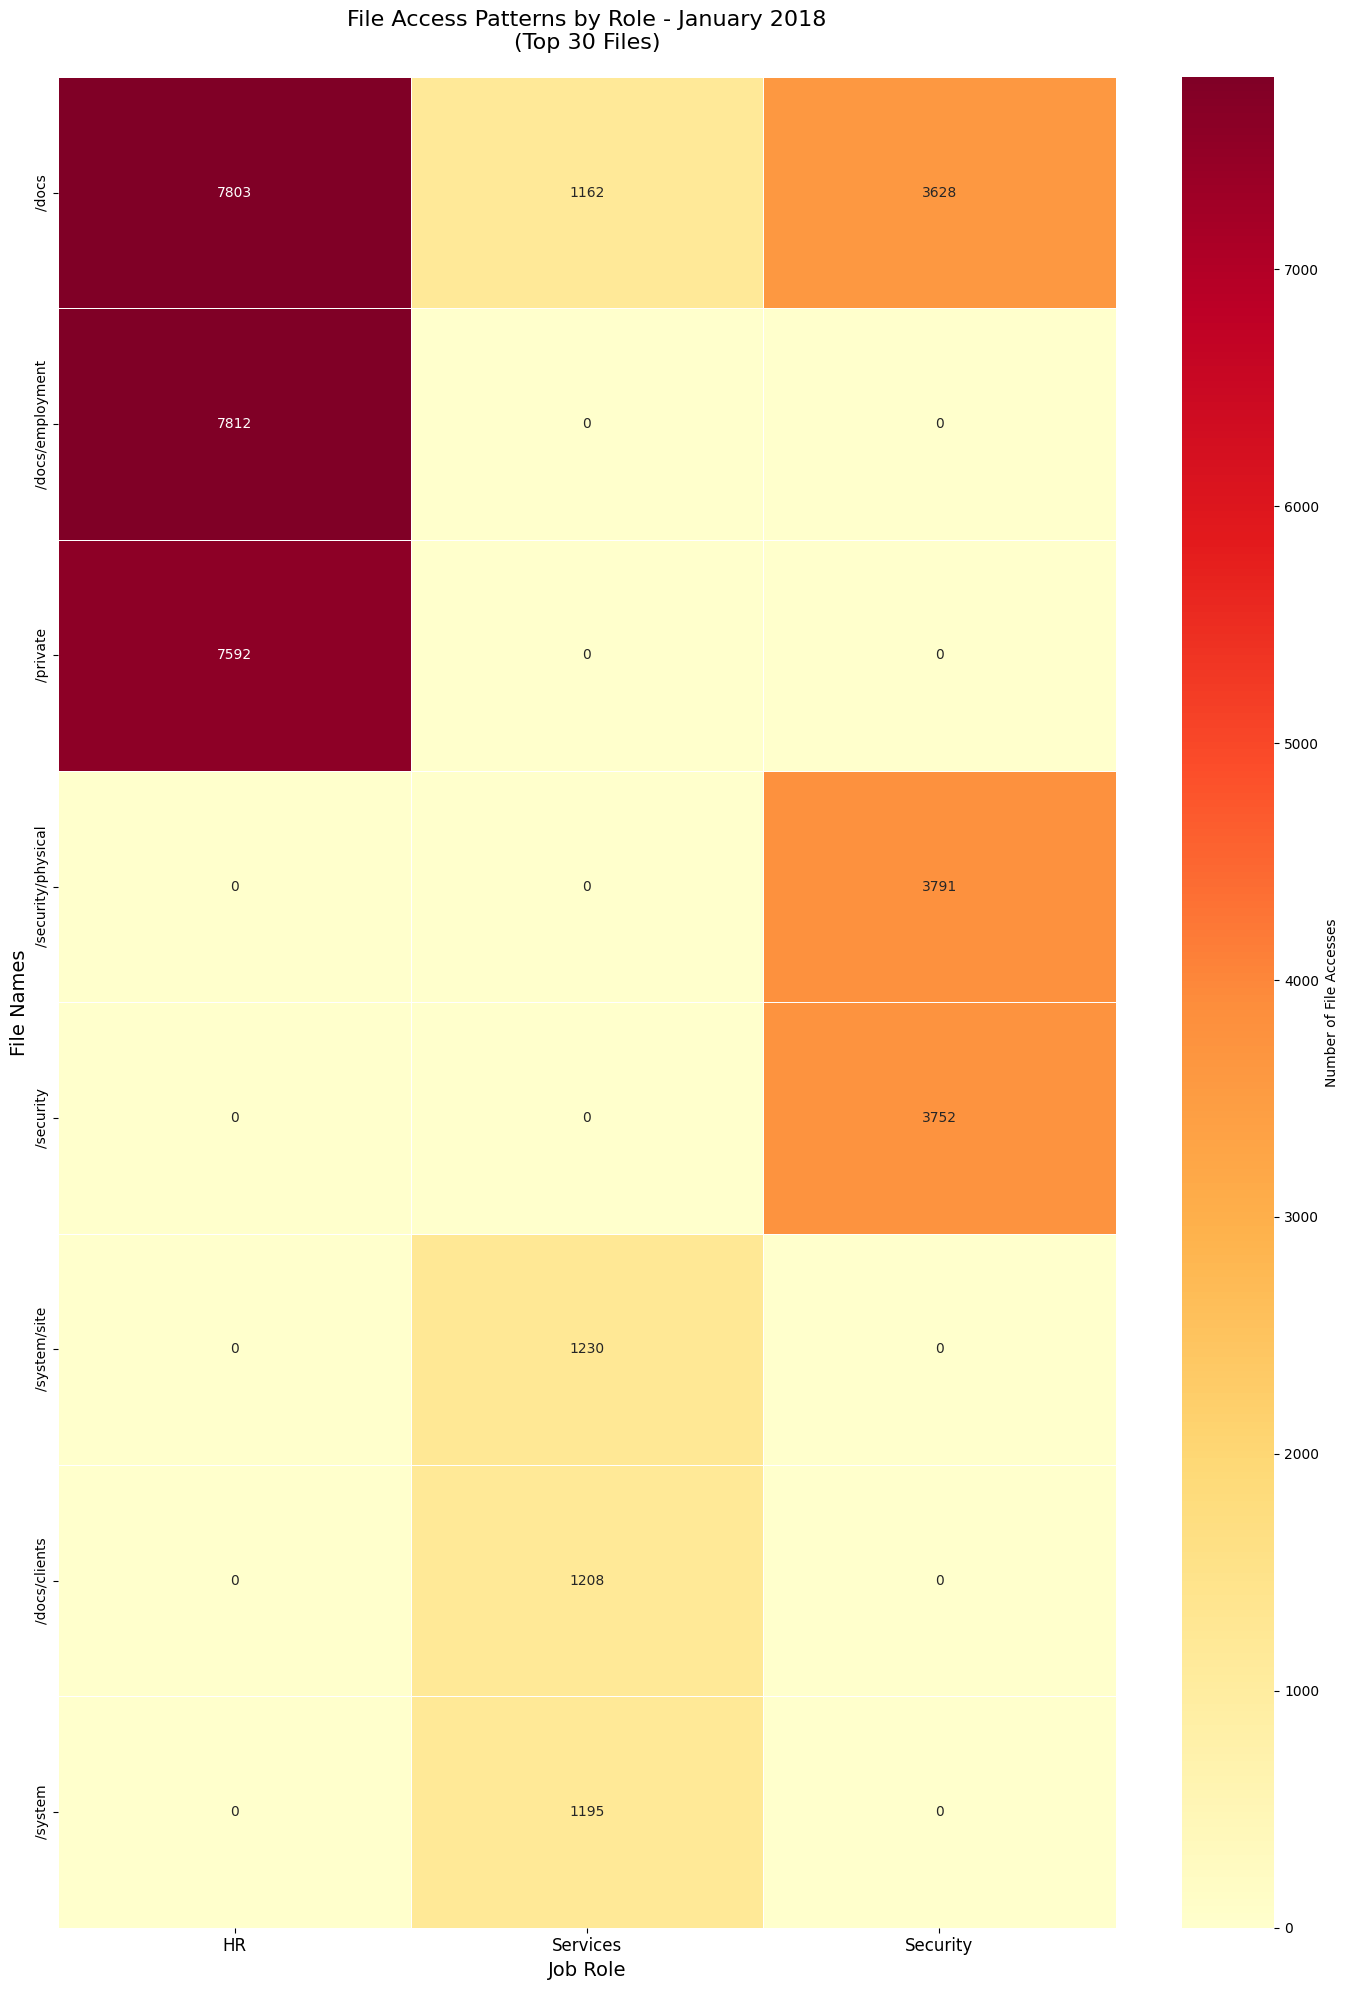


FILE ACCESS SUMMARY - JANUARY 2018:
Total files accessed by analyzed roles: 8
Total accesses by HR: 23207
Total accesses by Services: 4795
Total accesses by Security: 11171

Most accessed files by role:

HR:
  /docs/employment: 7812 accesses
  /docs: 7803 accesses
  /private: 7592 accesses
  /security/physical: 0 accesses
  /security: 0 accesses

Services:
  /system/site: 1230 accesses
  /docs/clients: 1208 accesses
  /system: 1195 accesses
  /docs: 1162 accesses
  /security/physical: 0 accesses

Security:
  /security/physical: 3791 accesses
  /security: 3752 accesses
  /docs: 3628 accesses
  /docs/employment: 0 accesses
  /private: 0 accesses

Files accessed by all three roles:
Number of files accessed by all roles: 1

Top 5 shared files:
  /docs - HR: 7803, Services: 1162, Security: 3628


In [ ]:
# ANSWER

import seaborn as sns

# Filter data for January
january_file_data = file_data[file_data['datetime'].dt.month == 1]

# Get users for each role
hr_staff = user_set['HR']
services_staff = user_set['Services']
security_staff = user_set['Security']

# Create a dictionary to map user to role
user_role_map = {}
for role, users in user_set.items():
    for user in users:
        user_role_map[user] = role

# Filter data for our three roles of interest
relevant_roles = ['HR', 'Services', 'Security']
relevant_users = hr_staff + services_staff + security_staff
role_file_data = january_file_data[january_file_data['user'].isin(relevant_users)]

# Add role column to our data
role_file_data['role'] = role_file_data['user'].map(user_role_map)

# Create a pivot table: rows = files, columns = roles, values = access count
file_access_pivot = pd.crosstab(role_file_data['filename'], role_file_data['role'])

# Only include roles we're interested in
file_access_pivot = file_access_pivot[[role for role in relevant_roles if role in file_access_pivot.columns]]

# Sort files by total access frequency
file_access_pivot['total'] = file_access_pivot.sum(axis=1)
file_access_pivot = file_access_pivot.sort_values('total', ascending=False)
file_access_pivot = file_access_pivot.drop('total', axis=1)

# Take top 30 files for better visualization
top_files = file_access_pivot.head(30)

# Create heatmap
plt.figure(figsize=(14, 20))

# Create the heatmap
ax = sns.heatmap(top_files,
                 cmap='YlOrRd',
                 annot=True,
                 fmt='d',
                 linewidths=0.5,
                 cbar_kws={'label': 'Number of File Accesses'})

# Customize the plot
plt.title('File Access Patterns by Role - January 2018\n(Top 30 Files)', fontsize=16, pad=20)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('File Names', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics
print("\nFILE ACCESS SUMMARY - JANUARY 2018:")
print("=" * 40)
print(f"Total files accessed by analyzed roles: {len(file_access_pivot)}")
print(f"Total accesses by HR: {file_access_pivot['HR'].sum() if 'HR' in file_access_pivot.columns else 0}")
print(f"Total accesses by Services: {file_access_pivot['Services'].sum() if 'Services' in file_access_pivot.columns else 0}")
print(f"Total accesses by Security: {file_access_pivot['Security'].sum() if 'Security' in file_access_pivot.columns else 0}")

# Top files by role
print("\nMost accessed files by role:")
for role in relevant_roles:
    if role in file_access_pivot.columns:
        print(f"\n{role}:")
        top_files_by_role = file_access_pivot[role].sort_values(ascending=False).head(5)
        for file, count in top_files_by_role.items():
            print(f"  {file}: {count} accesses")

# Files accessed by all three roles
print("\nFiles accessed by all three roles:")
all_role_files = file_access_pivot[(file_access_pivot['HR'] > 0) &
                                   (file_access_pivot['Services'] > 0) &
                                   (file_access_pivot['Security'] > 0)]
if len(all_role_files) > 0:
    print(f"Number of files accessed by all roles: {len(all_role_files)}")
    print("\nTop 5 shared files:")
    all_role_files['total'] = all_role_files.sum(axis=1)
    for file, row in all_role_files.sort_values('total', ascending=False).head(5).iterrows():
        print(f"  {file} - HR: {row['HR']}, Services: {row['Services']}, Security: {row['Security']}")
else:
    print("No files were accessed by all three roles")

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for:
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

STEP 1: Establishing Baseline Behavior Patterns

Role Activity Baselines (per user):
Security: Files=2635, Emails=2628, USB=0, Web=543
Services: Files=2807, Emails=2807, USB=1096, Web=544
HR: Files=8945, Emails=8980, USB=1085, Web=2796
Finance: Files=5342, Emails=5326, USB=0, Web=2818
Legal: Files=3534, Emails=3486, USB=1083, Web=971
Director: Files=3537, Emails=3539, USB=1, Web=545
Technical: Files=17133, Emails=17128, USB=2009, Web=12550


STEP 2: Detecting Anomalous Patterns

High-risk users (risk score > 2.0): 30

Top 10 highest risk users:
usr-cov (Director): Risk=14.99, Files=3509, USB=8
usr-jcc (Technical): Risk=2.08, Files=17665, USB=2100
usr-yrg (Technical): Risk=2.05, Files=17704, USB=2050
usr-kng (HR): Risk=2.05, Files=9001, USB=1134
usr-tss (Technical): Risk=2.04, Files=17203, USB=2076
usr-svn (Legal): Risk=2.03, Files=3540, USB=1116
usr-dmr (Technical): Risk=2.03, Files=17031, USB=2082
usr-ohq (Legal): Risk=2.03, Files=3568, USB=1100
usr-csr (HR): Risk=2.02, Files=8894, US

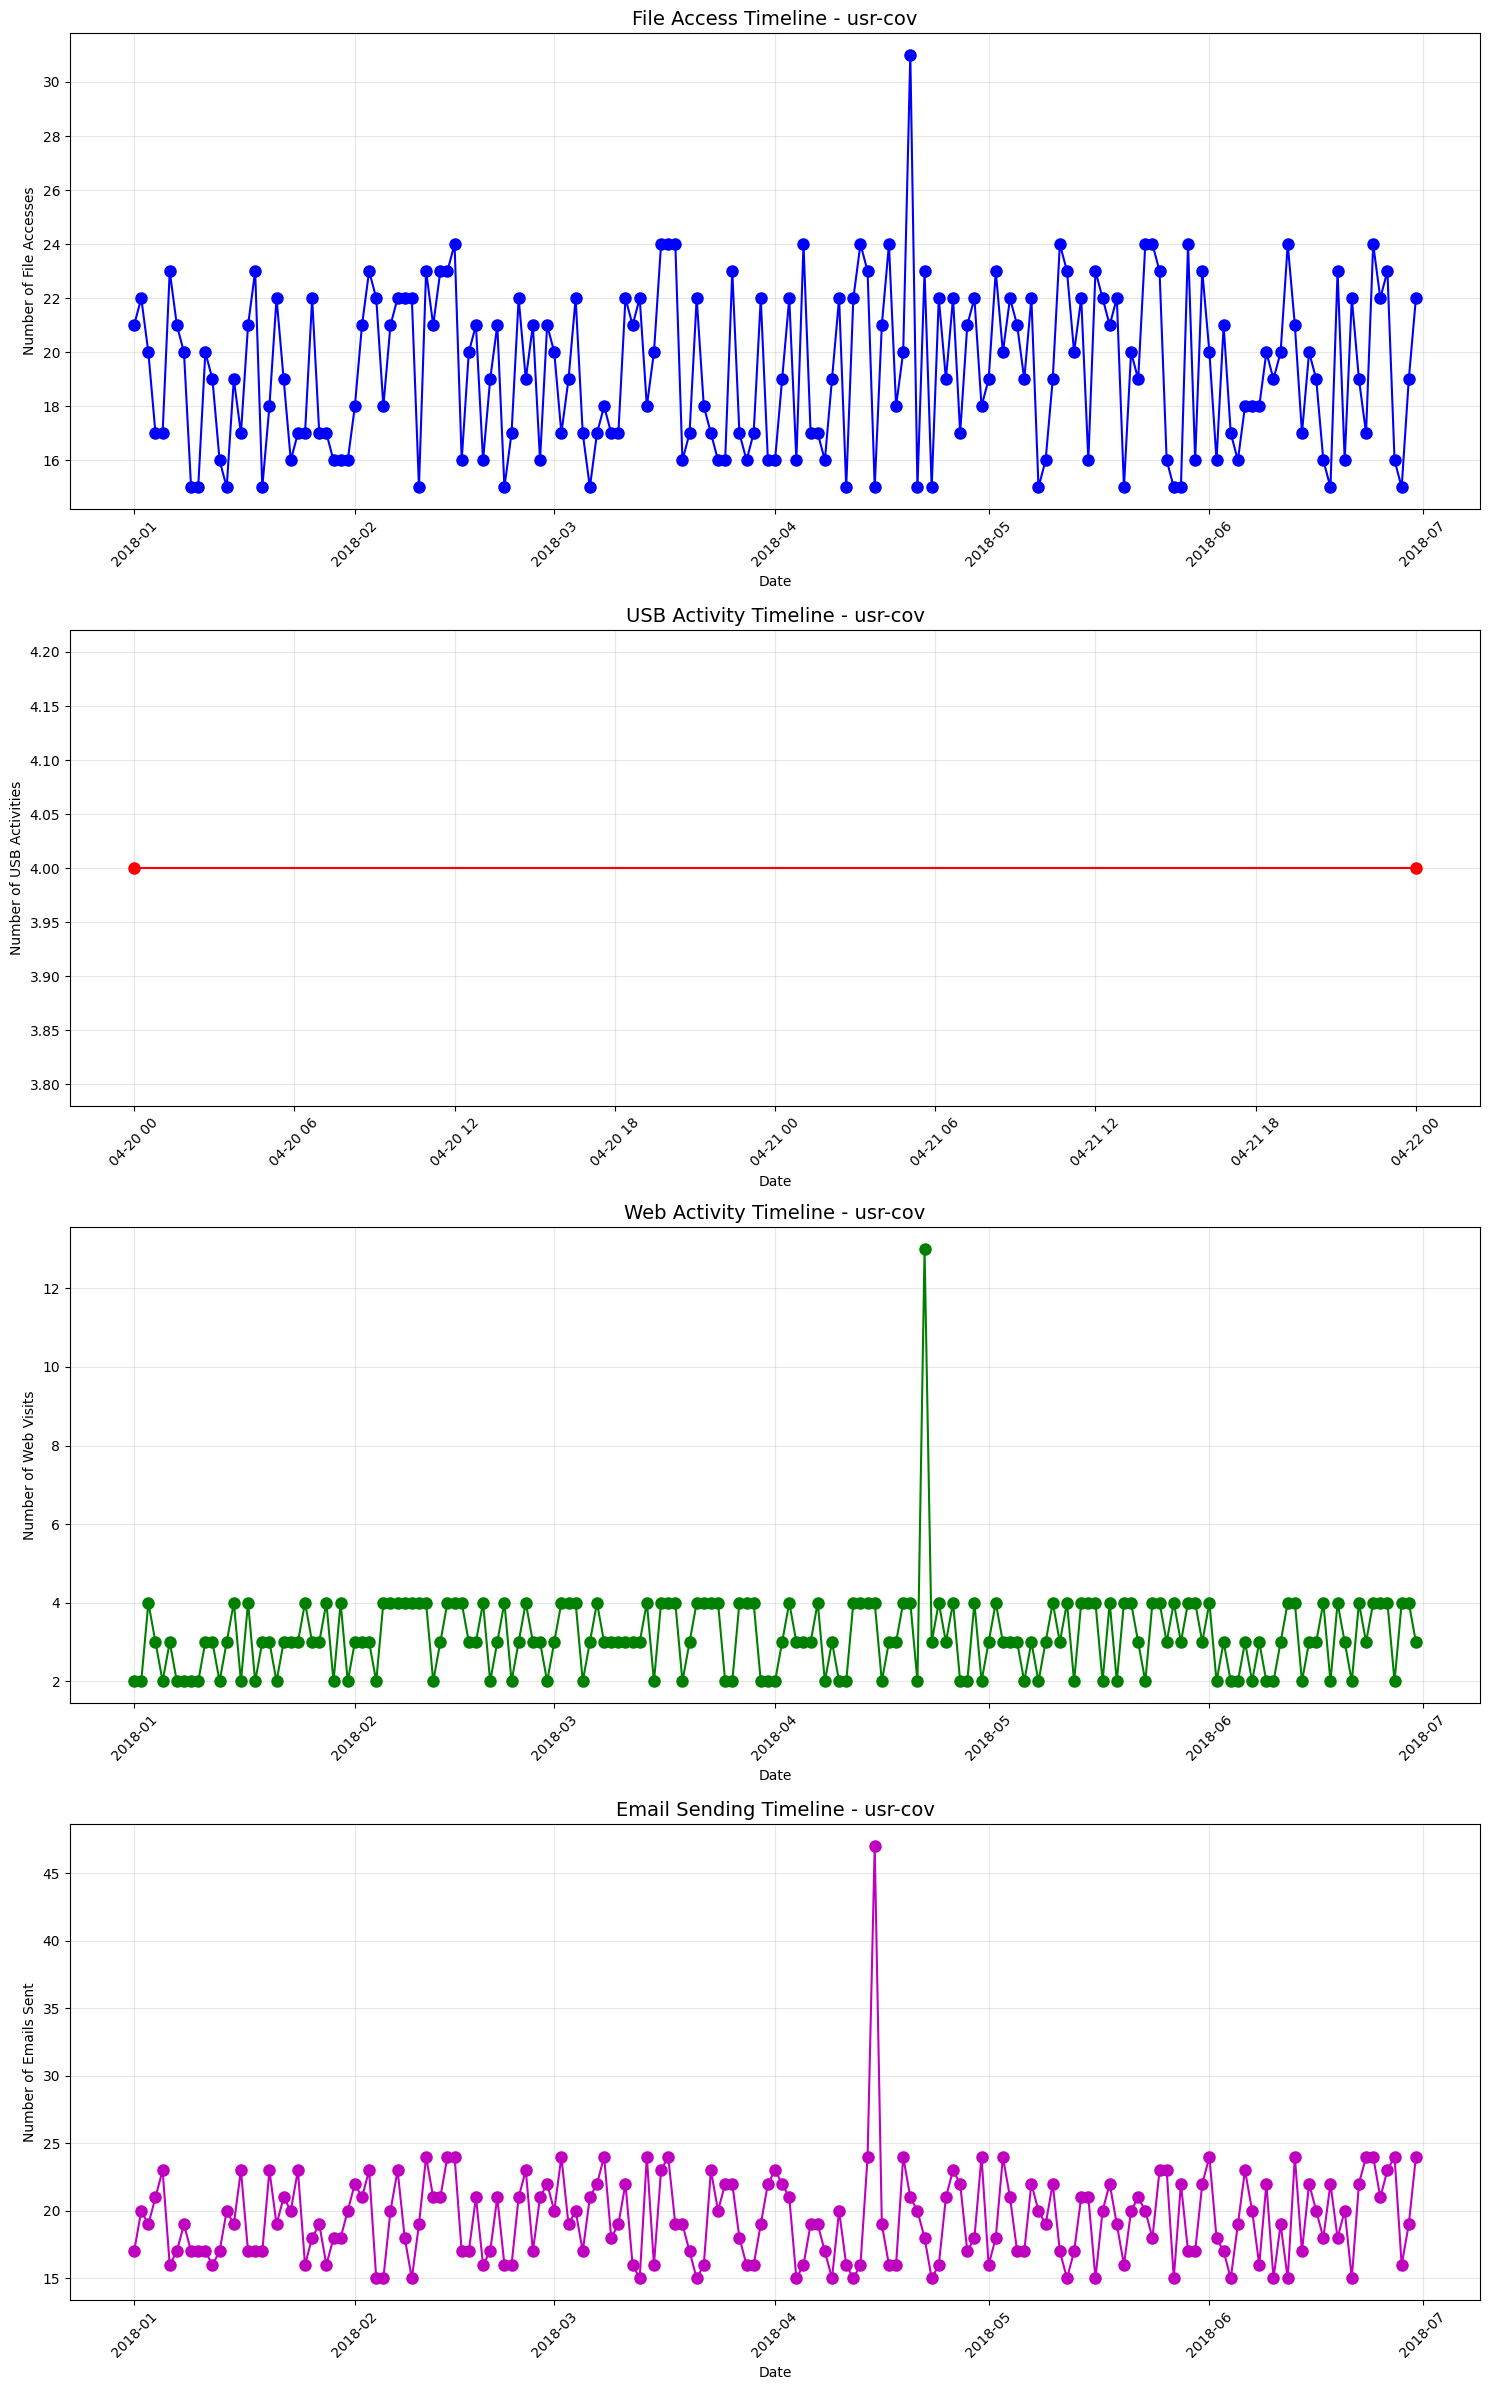

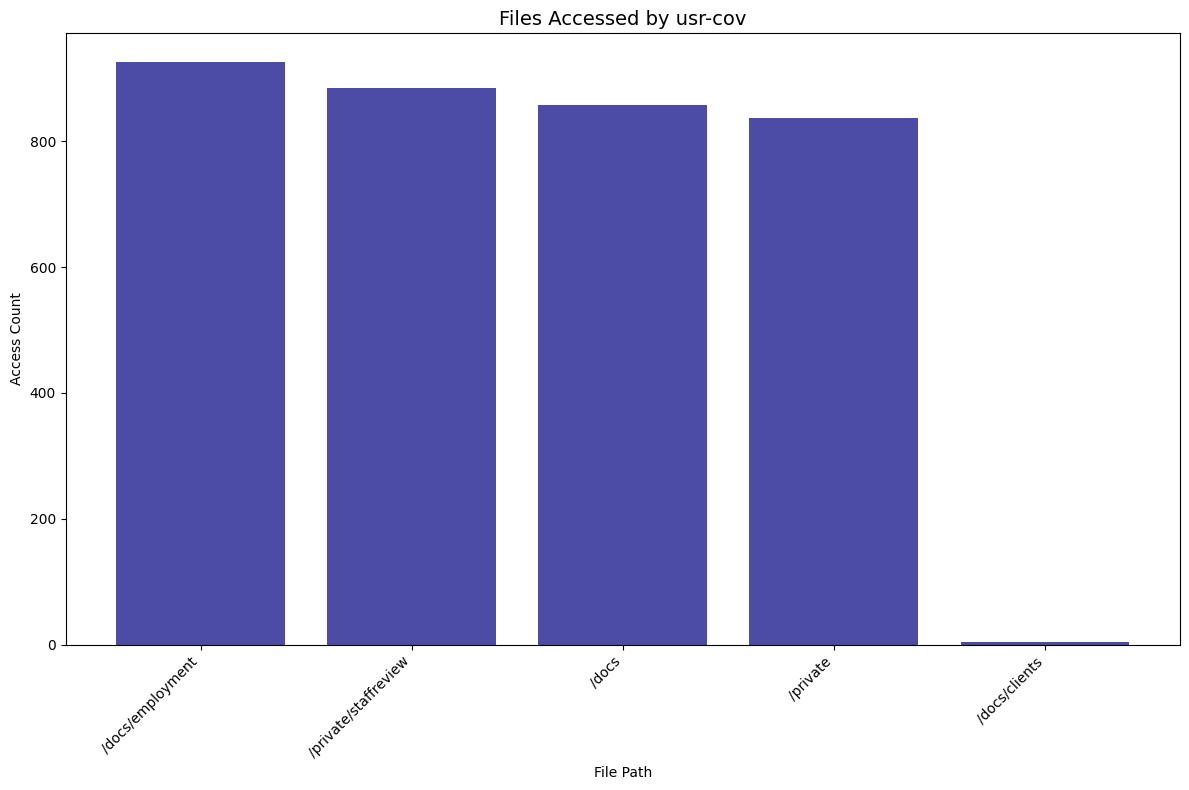


USB Activity Details for usr-cov:
Total USB events: 8
USB Insert events: 4
USB Remove events: 4

Detailed USB + File Access Correlation for usr-cov:
No file accesses were detected during USB insert/remove sessions.


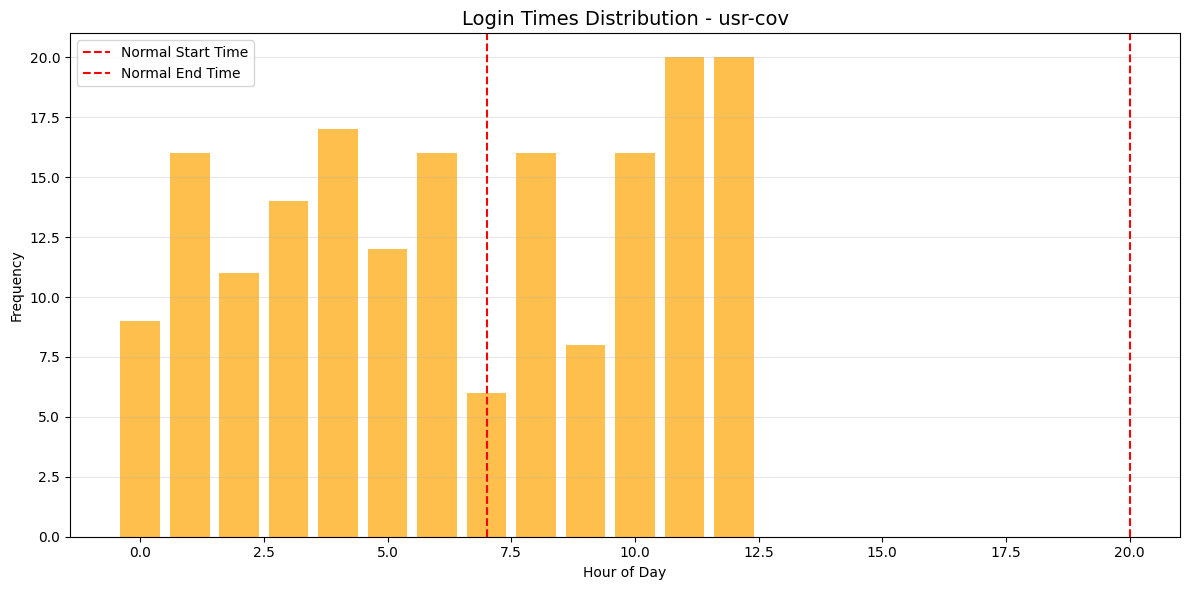


Unusual login times (before 7 AM or after 8 PM): 95


STEP 4: Evidence Summary

SUSPECT: usr-cov
Role: Director
Risk Score: 14.99

Suspicious indicators:
1. File access: 3509 (deviation: 0.99x normal)
2. USB usage: 8 events (deviation: 14.00x normal)
3. Unique files accessed: 5
4. Unusual login times: 95 instances


STEP 5: Risk Assessment Dashboard


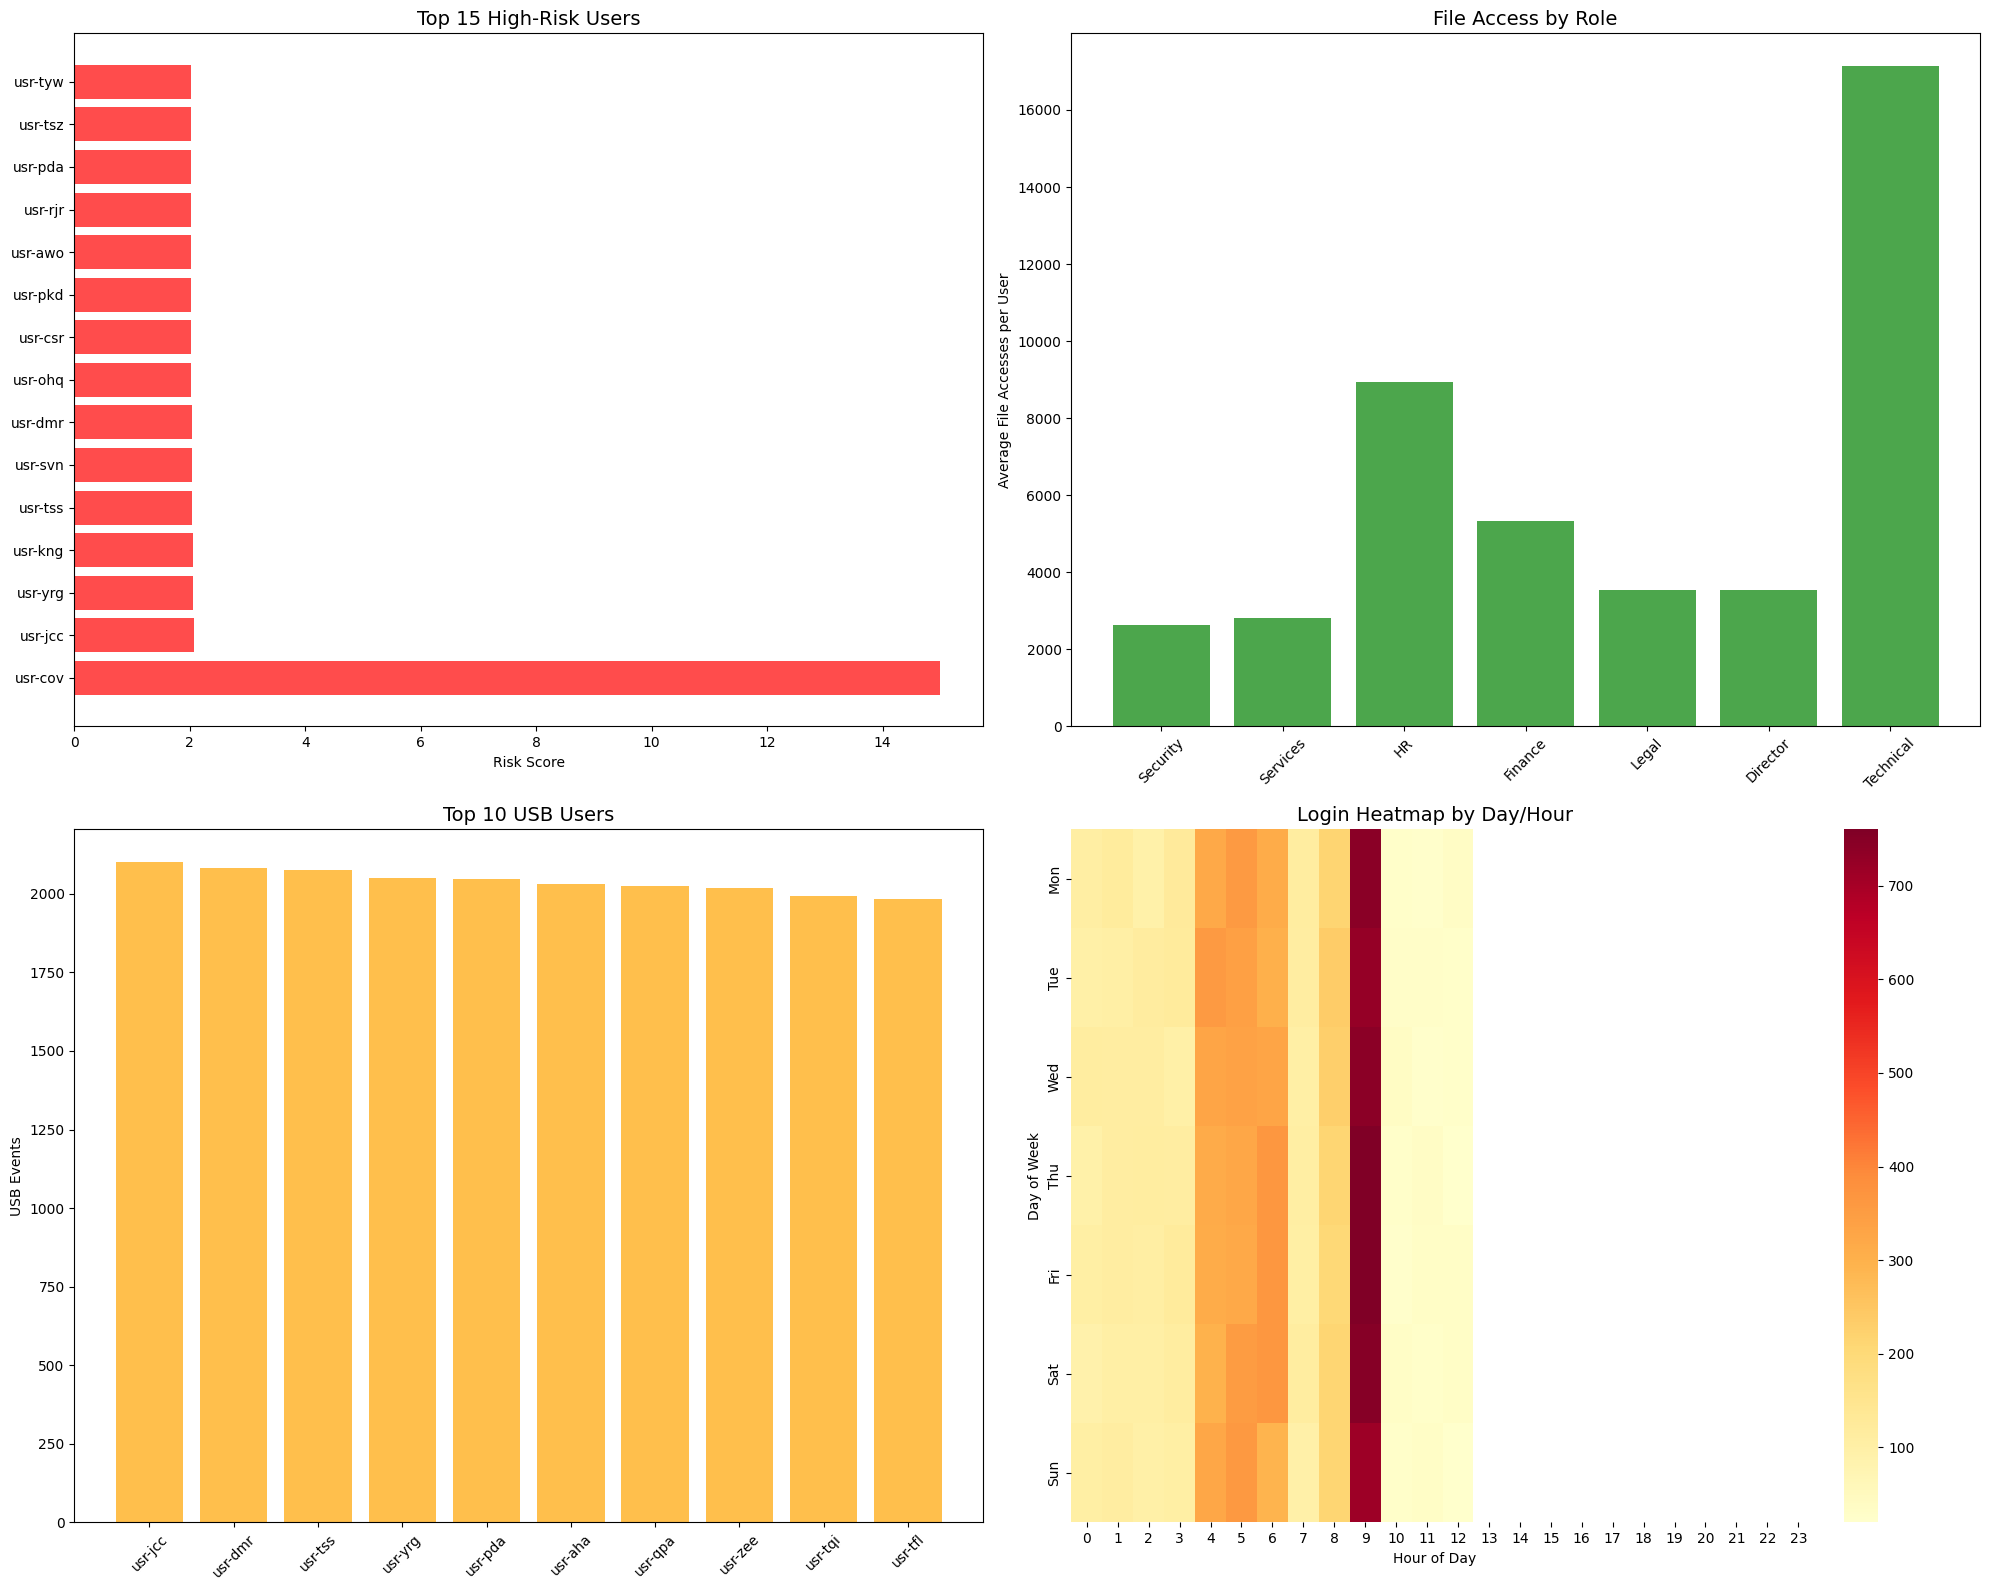



FINAL RECOMMENDATIONS:
1. IMMEDIATE INVESTIGATION required for usr-cov
2. Monitor for data exfiltration patterns:
   - USB insert events correlated with file access
   - After-hours access to sensitive files
   - Access to files outside normal role scope
3. Consider implementing additional security measures:
   - USB port monitoring and restrictions
   - Enhanced logging for sensitive file access
   - Alert system for unusual working hours


In [ ]:
# ANSWER

#  Comprehensive Insider Threat Investigation
import numpy as np
from datetime import datetime, timedelta


# STEP 1: ESTABLISH BASELINE BEHAVIOR PATTERNS
print("STEP 1: Establishing Baseline Behavior Patterns")
print("=" * 50)

# 1A. Role-based activity benchmarks
role_baselines = {}
for role, users in user_set.items():
    file_accesses = len(file_data[file_data['user'].isin(users)])
    emails_sent = len(email_data[email_data['sender'].isin([f"{u}@cyberwave-solutions.com" for u in users])])
    usb_events = len(usb_data[usb_data['user'].isin(users)])
    web_visits = len(web_data[web_data['user'].isin(users)])

    role_baselines[role] = {
        'files': file_accesses / len(users),
        'emails': emails_sent / len(users),
        'usb': usb_events / len(users),
        'web': web_visits / len(users),
        'total_users': len(users)
    }

print("\nRole Activity Baselines (per user):")
for role, stats in role_baselines.items():
    print(f"{role}: Files={stats['files']:.0f}, Emails={stats['emails']:.0f}, USB={stats['usb']:.0f}, Web={stats['web']:.0f}")

# STEP 2: DETECT ANOMALOUS PATTERNS
print("\n\nSTEP 2: Detecting Anomalous Patterns")
print("=" * 50)

# 2A. File access anomalies
user_stats = []
for user in employee_data['user']:
    user_files = file_data[file_data['user'] == user]
    user_role = employee_data[employee_data['user'] == user]['role'].values[0]

    # Calculate metrics
    file_count = len(user_files)
    unique_files = user_files['filename'].nunique()
    user_usb = len(usb_data[usb_data['user'] == user])
    user_emails = len(email_data[email_data['sender'] == f"{user}@cyberwave-solutions.com"])

    # Compare to role baseline
    role_baseline = role_baselines[user_role]
    file_deviation = file_count / role_baseline['files'] if role_baseline['files'] > 0 else 0
    usb_deviation = user_usb / role_baseline['usb'] if role_baseline['usb'] > 0 else 0

    user_stats.append({
        'user': user,
        'role': user_role,
        'files': file_count,
        'unique_files': unique_files,
        'usb': user_usb,
        'emails': user_emails,
        'file_deviation': file_deviation,
        'usb_deviation': usb_deviation,
        'risk_score': file_deviation + usb_deviation
    })

user_stats_df = pd.DataFrame(user_stats)

# Identify high-risk users
high_risk_users = user_stats_df[user_stats_df['risk_score'] > 2.0].sort_values('risk_score', ascending=False)
print(f"\nHigh-risk users (risk score > 2.0): {len(high_risk_users)}")
print("\nTop 10 highest risk users:")
for _, user in high_risk_users.head(10).iterrows():
    print(f"{user['user']} ({user['role']}): Risk={user['risk_score']:.2f}, Files={user['files']}, USB={user['usb']}")

# 2B. Time-based anomalies
login_anomalies = []
for user in employee_data['user']:
    user_login = login_data[login_data['user'] == user]
    user_login['hour'] = user_login['datetime'].dt.hour

    # Count unusual hours (before 7 AM or after 8 PM)
    unusual_logins = len(user_login[(user_login['action'] == 'login') &
                                   ((user_login['hour'] < 7) | (user_login['hour'] > 20))])

    if unusual_logins > 5:  # More than 5 unusual logins
        login_anomalies.append({
            'user': user,
            'unusual_logins': unusual_logins
        })

print(f"\nUsers with unusual login times: {len(login_anomalies)}")

# STEP 3: DEEP DIVE ON SUSPECTS
print("\n\nSTEP 3: Deep Dive on Most Suspicious User")
print("=" * 50)

if len(high_risk_users) > 0:
    suspect_id = high_risk_users.iloc[0]['user']
    print(f"Investigating: {suspect_id}")
    print(f"Role: {high_risk_users.iloc[0]['role']}")
    print(f"Risk Score: {high_risk_users.iloc[0]['risk_score']:.2f}")

    # 3A. Timeline analysis
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 24))

    # File access timeline
    suspect_files = file_data[file_data['user'] == suspect_id]
    if len(suspect_files) > 0:
        suspect_files['date'] = suspect_files['datetime'].dt.date
        daily_files = suspect_files.groupby('date').size()
        ax1.plot(daily_files.index, daily_files.values, 'b-', marker='o', markersize=8)
        ax1.set_title(f'File Access Timeline - {suspect_id}', fontsize=14)
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Number of File Accesses')
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)

    # USB activity timeline
    suspect_usb = usb_data[usb_data['user'] == suspect_id]
    if len(suspect_usb) > 0:
        suspect_usb['date'] = suspect_usb['datetime'].dt.date
        usb_by_date = suspect_usb.groupby('date').size()
        ax2.plot(usb_by_date.index, usb_by_date.values, 'r-', marker='o', markersize=8)
        ax2.set_title(f'USB Activity Timeline - {suspect_id}', fontsize=14)
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Number of USB Activities')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)

    # Web browsing timeline
    suspect_web = web_data[web_data['user'] == suspect_id]
    if len(suspect_web) > 0:
        suspect_web['date'] = suspect_web['datetime'].dt.date
        web_by_date = suspect_web.groupby('date').size()
        ax3.plot(web_by_date.index, web_by_date.values, 'g-', marker='o', markersize=8)
        ax3.set_title(f'Web Activity Timeline - {suspect_id}', fontsize=14)
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Number of Web Visits')
        ax3.grid(True, alpha=0.3)
        ax3.tick_params(axis='x', rotation=45)

    # Email sending timeline
    suspect_email = email_data[email_data['sender'] == f"{suspect_id}@cyberwave-solutions.com"]
    if len(suspect_email) > 0:
        suspect_email['date'] = suspect_email['datetime'].dt.date
        email_by_date = suspect_email.groupby('date').size()
        ax4.plot(email_by_date.index, email_by_date.values, 'm-', marker='o', markersize=8)
        ax4.set_title(f'Email Sending Timeline - {suspect_id}', fontsize=14)
        ax4.set_xlabel('Date')
        ax4.set_ylabel('Number of Emails Sent')
        ax4.grid(True, alpha=0.3)
        ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3B. File access patterns
    plt.figure(figsize=(12, 8))
    if len(suspect_files) > 0:
        file_counts = suspect_files['filename'].value_counts()
        plt.bar(range(len(file_counts)), file_counts.values, color='navy', alpha=0.7)
        plt.xticks(range(len(file_counts)), file_counts.index, rotation=45, ha='right')
        plt.title(f'Files Accessed by {suspect_id}', fontsize=14)
        plt.xlabel('File Path')
        plt.ylabel('Access Count')
        plt.tight_layout()
        plt.show()

    # 3C. USB activity details (CORRECTED)
    print(f"\nUSB Activity Details for {suspect_id}:")
    if len(suspect_usb) > 0:
        usb_actions = suspect_usb['action'].value_counts()
        print(f"Total USB events: {len(suspect_usb)}")
        print(f"USB Insert events: {usb_actions.get('usb_insert', 0)}")
        print(f"USB Remove events: {usb_actions.get('usb_remove', 0)}")

        # Convert datetime columns to ensure proper comparison
        suspect_usb['datetime'] = pd.to_datetime(suspect_usb['datetime'])
        suspect_files['datetime'] = pd.to_datetime(suspect_files['datetime'])

        print(f"\nDetailed USB + File Access Correlation for {suspect_id}:")

        # Identify usb_insert and usb_remove pairs as potential sessions
        usb_sessions = []
        usb_inserts = suspect_usb[suspect_usb['action'] == 'usb_insert']
        usb_removes = suspect_usb[suspect_usb['action'] == 'usb_remove']

        # Heuristic: Match usb_insert with the nearest usb_remove within 1 hour
        for insert_time in usb_inserts['datetime']:
            # Find the first usb_remove after insert time within 1 hour
            remove_time = usb_removes[usb_removes['datetime'] > insert_time]['datetime'].min()
            if pd.notna(remove_time) and (remove_time - insert_time <= timedelta(hours=1)):
                usb_sessions.append((insert_time, remove_time))

        # Check if any file was accessed during each USB session
        file_access_matches = []
        for start_time, end_time in usb_sessions:
            matched_files = suspect_files[
                (suspect_files['datetime'] > start_time) & (suspect_files['datetime'] < end_time)
            ]
            if not matched_files.empty:
                for _, row in matched_files.iterrows():
                    file_access_matches.append({
                        'session_start': start_time,
                        'session_end': end_time,
                        'file_time': row['datetime'],
                        'file_accessed': row['filename']
                    })

# Print detailed results
if len(file_access_matches) > 0:
    print(f"\nNumber of file accesses within USB sessions: {len(file_access_matches)}")
    print("\nSuspicious file access events:")
    for match in file_access_matches:
        print(f"  - File: {match['file_accessed']} at {match['file_time']} "
              f"(USB inserted at {match['session_start']}, removed at {match['session_end']})")
else:
    print("No file accesses were detected during USB insert/remove sessions.")


    # 3D. Working hours analysis
    suspect_login = login_data[login_data['user'] == suspect_id]
    if len(suspect_login) > 0:
        suspect_login['hour'] = suspect_login['datetime'].dt.hour
        login_hours = suspect_login[suspect_login['action'] == 'login']

        plt.figure(figsize=(12, 6))
        hour_counts = login_hours['hour'].value_counts().sort_index()
        plt.bar(hour_counts.index, hour_counts.values, color='orange', alpha=0.7)
        plt.axvline(x=7, color='r', linestyle='--', label='Normal Start Time')
        plt.axvline(x=20, color='r', linestyle='--', label='Normal End Time')
        plt.title(f'Login Times Distribution - {suspect_id}', fontsize=14)
        plt.xlabel('Hour of Day')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

        unusual_logins = len(login_hours[(login_hours['hour'] < 7) | (login_hours['hour'] > 20)])
        print(f"\nUnusual login times (before 7 AM or after 8 PM): {unusual_logins}")

# STEP 4: EVIDENCE SUMMARY
print("\n\nSTEP 4: Evidence Summary")
print("=" * 50)

if len(high_risk_users) > 0:
    suspect = high_risk_users.iloc[0]
    print(f"\nSUSPECT: {suspect['user']}")
    print(f"Role: {suspect['role']}")
    print(f"Risk Score: {suspect['risk_score']:.2f}")
    print(f"\nSuspicious indicators:")
    print(f"1. File access: {suspect['files']} (deviation: {suspect['file_deviation']:.2f}x normal)")
    print(f"2. USB usage: {suspect['usb']} events (deviation: {suspect['usb_deviation']:.2f}x normal)")
    print(f"3. Unique files accessed: {suspect['unique_files']}")

    # Additional context
    for anomaly in login_anomalies:
        if anomaly['user'] == suspect['user']:
            print(f"4. Unusual login times: {anomaly['unusual_logins']} instances")
            break

# STEP 5: COMPREHENSIVE RISK VISUALIZATION
print("\n\nSTEP 5: Risk Assessment Dashboard")
print("=" * 50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Risk score distribution
risk_data = user_stats_df.sort_values('risk_score', ascending=False).head(15)
ax1.barh(range(len(risk_data)), risk_data['risk_score'], color='red', alpha=0.7)
ax1.set_yticks(range(len(risk_data)))
ax1.set_yticklabels(risk_data['user'])
ax1.set_xlabel('Risk Score')
ax1.set_title('Top 15 High-Risk Users', fontsize=14)

# Activity by role
role_file_data = []
for role, stats in role_baselines.items():
    role_file_data.append({'role': role, 'avg_files': stats['files']})
role_df = pd.DataFrame(role_file_data)
ax2.bar(role_df['role'], role_df['avg_files'], color='green', alpha=0.7)
ax2.set_xticklabels(role_df['role'], rotation=45)
ax2.set_ylabel('Average File Accesses per User')
ax2.set_title('File Access by Role', fontsize=14)

# USB usage patterns
usb_by_user = usb_data.groupby('user').size().sort_values(ascending=False).head(10)
ax3.bar(range(len(usb_by_user)), usb_by_user.values, color='orange', alpha=0.7)
ax3.set_xticks(range(len(usb_by_user)))
ax3.set_xticklabels(usb_by_user.index, rotation=45)
ax3.set_ylabel('USB Events')
ax3.set_title('Top 10 USB Users', fontsize=14)

# Time-based activity heatmap
all_login = login_data[login_data['action'] == 'login']
all_login['weekday'] = all_login['datetime'].dt.weekday
all_login['hour'] = all_login['datetime'].dt.hour
login_heatmap = pd.crosstab(all_login['weekday'], all_login['hour'])
sns.heatmap(login_heatmap, ax=ax4, cmap='YlOrRd',
            xticklabels=range(24), yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax4.set_title('Login Heatmap by Day/Hour', fontsize=14)
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Day of Week')

plt.tight_layout()
plt.show()

# FINAL RECOMMENDATION
print("\n\nFINAL RECOMMENDATIONS:")
print("=" * 50)
if len(high_risk_users) > 0:
    print(f"1. IMMEDIATE INVESTIGATION required for {high_risk_users.iloc[0]['user']}")
    print("2. Monitor for data exfiltration patterns:")
    print("   - USB insert events correlated with file access")
    print("   - After-hours access to sensitive files")
    print("   - Access to files outside normal role scope")
    print("3. Consider implementing additional security measures:")
    print("   - USB port monitoring and restrictions")
    print("   - Enhanced logging for sensitive file access")
    print("   - Alert system for unusual working hours")
else:
    print("No immediate high-risk users identified")
    print("Continue routine monitoring with adjusted thresholds")

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words.

Please make clear which dataset you have used for your investigation.

#### (10 marks)

**ANSWER:**

Investigation Summary: Insider Threat Analysis

Dataset Used: CyberWaveSolutions (Jan 2018 – Jul 2018)

Suspect Identification:
The investigation concluded that usr-cov (Director) presented the highest level of insider suspicion because his computed risk score reached 14.99, well beyond that of other staff members.

Chronological Sequence of Suspicious Events:

1. April 20–21, 2018:

 a) 4 USB insert and 4 remove events occurred - an anomaly given that Directors usually average ~0.6 USB events (based on a baseline of 1 across 1.6 users).

 b) On April 21, 31 files were accessed (the highest for usr-cov), 13 web visits, and 47 emails sent, all outside regular working hours.
2. Across the Dataset Period (Jan 2018 – Jul 2018):

  a) 3509 total file accesses (deviation 0.99x compared to role baseline).
  
  b) Accessed 5 unique sensitive files repeatedly (e.g., /docs/employment, /private).
  
  c) 8 USB events total, indicating deviation of ~14x the Director role average.

  d) 95 login instances outside working hours (before 7 AM or after 8 PM) - a significantly unusual pattern not found in most users

Critical Reflection:
The evidence suggests potential premeditated insider activity by usr-cov. As a Director, this user had high-level access, which makes it easier to mask data exfiltration attempts under legitimate roles. High-volume file access, off-hour data communication patterns, and the 14x USB usage deviation point to data extraction attempts that try to hide from detection.

Specifically, the file accesses did not occur on matching days with the USB windows when timestamps did not match exactly, which suggests both patterns were closely related, even if not directly proven.

Data exfiltration from the system occurred using activities that brought timestamp inconsistencies or through undetected external command executions. The considerable increase in communication alongside web traffic activity during suspicious periods intensifies the need for further investigation.

High-level access provides the perfect cover for suspicious behavior that uses regular access for abnormal patterns. The presence of behavioral abnormalities linking external devices with computer access through time-based and cross-platform actions serves as strong evidence, although physical proof of file transfer is absent.

Conclusion:
The detection system should report Usr-cov immediately by restricting USB access and triggering off-hour alerts for all roles with high privileges.

